In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pysynphot as S
from scipy.interpolate import interp1d
from astropy.io import fits

In [2]:
S.refs.showref()

graphtable: /home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/mtab/57g1733im_tmg.fits
 comptable: /home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/mtab/5as18041m_tmc.fits
thermtable: /home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/mtab/3241637sm_tmt.fits
      area: 45238.93416
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True


In [3]:
WLMIN=3000. # Minimum wavelength : PySynPhot works with Angstrom
WLMAX=11000. # Minimum wavelength : PySynPhot works with Angstrom

NBINS=int(WLMAX-WLMIN) # Number of bins between WLMIN and WLMAX
BinWidth=(WLMAX-WLMIN)/float(NBINS) # Bin width in Angstrom
WL=np.linspace(WLMIN,WLMAX,NBINS)   # Array of wavelength in Angstrom
# from key numbers
Reff=642.3/2. # effective radius in cm
Seff= np.pi*Reff**2  # in cm2
print(Seff)
exptime=30.0

324015.4546769212


In [4]:
S.refs.setref(area=Seff, waveset=None) # set by default to 6.4230 m effective aperture 
S.refs.set_default_waveset(minwave=WLMIN, maxwave=WLMAX, num=NBINS, delta=BinWidth, log=False)
S.refs.showref()

graphtable: /home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/mtab/57g1733im_tmg.fits
 comptable: /home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/mtab/5as18041m_tmc.fits
thermtable: /home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/mtab/3241637sm_tmt.fits
      area: 324015.4546769212
   waveset: Min: 3000.0, Max: 11000.0, Num: None, Delta: 1.0, Log: False


# Find the CALSPEC spectra

In [5]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')
print(path_sed_calspec)

/home/martin/auxtel_lsst/External/pysynphot_data/grp/redcat/trds/calspec


In [6]:
spectra = os.listdir(path_sed_calspec)
#spectra
len(spectra)

846

# Select CALSPEC spectrum

In [7]:
select_mod_spectra = False

In [8]:
if select_mod_spectra:
    sed_list = [f for f in os.listdir(path_sed_calspec) if '.fits' in f and 'WDcovar_' not in f]
else:
    sed_list = [f for f in os.listdir(path_sed_calspec) if '.fits' in f and '_mod' not in f and 'WDcovar_' not in f]
print(len(sed_list))

616


In [9]:
#spec_test = S.Vega
#print(spec_test.name)
#sed_list = ['alpha_lyr_stis_010.fits']

In [10]:
sed_dict = {}
for sed in sed_list:
    #print('-------')
    #print(sed)
    spec_ = S.FileSpectrum(os.path.join(path_sed_calspec,sed))
    sed_dict[os.path.basename(spec_.name)[:-5]] = spec_

Warning, 1 of 4721 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 40 of 3662 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 4834 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 6990 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 4801 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3738 bins contained negative fluxes; they have been set to zero.
Warning, 81 of 6588 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 4864 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6706 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 2836 bins contained negative f

Warning, 94 of 6878 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 6583 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 1353 bins contained negative fluxes; they have been set to zero.
Warning, 146 of 2329 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 4465 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 2064 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6263 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 2901 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 2866 bins contained negative fluxes; they have been set to zero.
Warning, 28 of 2778 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 1428 bins contained negativ

    START STIS                                                                   [astropy.io.fits.card]
FILE WRITTEN BY ECHLREDUCE.PRO ON 11-Jun-2013 11:27:39.00                        [astropy.io.fits.card]
coadd list for E*H:                                                              [astropy.io.fits.card]
 o57u01030 obb001040 obb005010 obb005020 obb001010 obb001090 obb005030           [astropy.io.fits.card]
 obb005040 obb001060 obb001030 o57u01020 obb001050 obb001020 obb0010a0           [astropy.io.fits.card]
 obb001070 o6hb100f0 obb001080 o57u01040 o5i011010 o5i011020 o5i011030           [astropy.io.fits.card]
 obb0010b0 obb002090 obb0020b0 obb002010 obb002030 o6hb20060 obb002020           [astropy.io.fits.card]
 o6hb20070 obb002040 o6hb20080 obb002050 obb002060 o6hb20090 obb002070           [astropy.io.fits.card]
 obb002080 obb0020a0 obb0020c0 obb0020d0 obb004080 obb053040 obb053080           [astropy.io.fits.card]
 obb053010 obb053020 obb053030 obb053050 obb053060 obb0530a0 obb

Warning, 1 of 6560 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 48 of 4573 bins contained negative fluxes; they have been set to zero.
Warning, 8 of 3738 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 2190 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 2866 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6265 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 66 of 4711 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 3884 bins contained negative fluxes; they have been set to zero.
Warning, 8 of 4804 bins contained negative flu

Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
Warning, 72 of 6878 bins contained negative fluxes; they have been set to zero.
Warning, 94 of 6875 bins contained negative fluxes; they have been set to zero.
Warning, 13 of 6263 bins contained negative fluxes; they have been set to zero.
Warning, 66 of 6587 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 6673 bins contained negative fluxes; they have been set to zero.
Warning, 11 of 2788 bins contained negative fluxes; they have been set to zero.
Warning, 919 of 2788 bins contained negative fluxes; they have been set to zero.
Warning, 195 of 1415 bins contained negative fluxes; they have been set to zero.
Warning, 21 of 4684 bins contained negative fluxes; they have been set to zero.
Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 31 of 1434 bins contained negative fluxes; they have been set to zero.
Warning, 145 of 2236 bins contained ne

# Load selected CALSPEC spectrum with pysynphot 

In [11]:
for sed_ in sed_dict.keys():
    spec = sed_dict[sed_]
    spec.convert('photlam')
    if any(spec.flux>=10000.):
        print(os.path.basename(spec.name))

sun_reference_stis_001.fits
sun_reference_001.fits
sun_reference_stis_002.fits


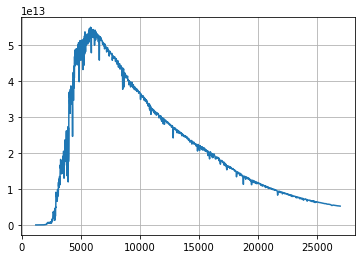

In [12]:
spec_sun = sed_dict['sun_reference_stis_001']
plt.plot(spec_sun.wave,spec_sun.flux)
plt.grid()

In [13]:
sed_dict.pop('sun_reference_stis_001')
sed_dict.pop('sun_reference_stis_002')
sed_dict.pop('sun_reference_001')

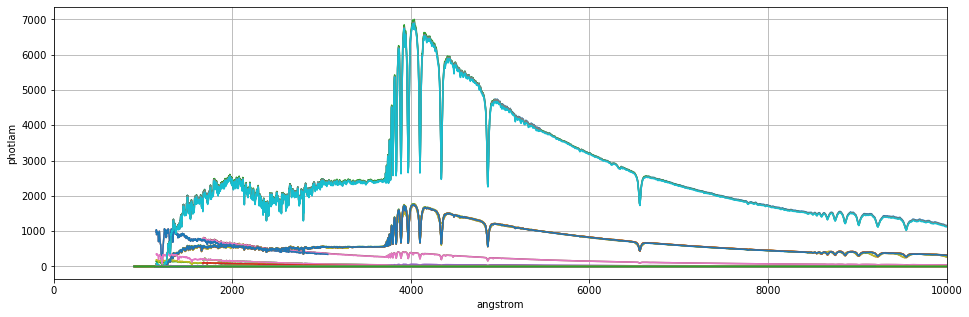

In [14]:
fig=plt.figure(figsize=(16,5))
for sed_ in sed_dict.keys():
    spec = sed_dict[sed_]
    spec.convert('photlam')
    plt.plot(spec.wave,spec.flux)
    plt.xlabel(spec.waveunits)
    plt.ylabel(spec.fluxunits)
    plt.xlim((0,10000))
    plt.grid()


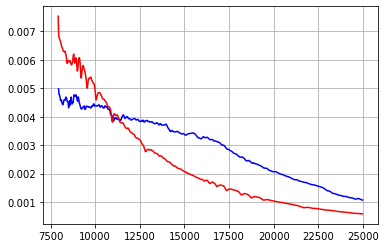

In [15]:
plt.plot(sed_dict['kf01t5_nic_004'].wave,sed_dict['kf01t5_nic_004'].flux,color='b')
plt.plot(sed_dict['1812524_nic_004'].wave,sed_dict['1812524_nic_004'].flux,color='r')
plt.grid()

In [16]:
sed_dict.pop('kf01t5_nic_004')
sed_dict.pop('1812524_nic_004')

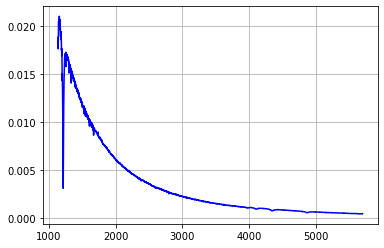

In [17]:
plt.plot(sed_dict['wd0947_857_stis_004'].wave,sed_dict['wd0947_857_stis_004'].flux,color='b')
plt.grid()

In [18]:
sed_dict.pop('wd0947_857_stis_004')

# Load LSST transmissions file 

In [19]:
datafilename = "data/lsst/transmissions-LSST.dat"
df=pd.read_csv(datafilename,names=['wl','Topt','Tccd','U','G','R','I','Z','Y4','atm'],sep='\t')

In [20]:
wl=df['wl'].values
U=df['U'].values/100.
G=df['G'].values/100.
R=df['R'].values/100.
I=df['I'].values/100.
Z=df['Z'].values/100.
Y4=df['Y4'].values/100.

lsst_bp = []
lsst_bp.append(S.ArrayBandpass(wl*10, U , name="u"))
lsst_bp.append(S.ArrayBandpass(wl*10, G , name="g"))
lsst_bp.append(S.ArrayBandpass(wl*10, R , name="r"))
lsst_bp.append(S.ArrayBandpass(wl*10, I , name="i"))
lsst_bp.append(S.ArrayBandpass(wl*10, Z , name="z"))
lsst_bp.append(S.ArrayBandpass(wl*10, Y4 , name="Y"))

In [21]:
filters = ['U','G','R','I','Z','Y']
filter_names = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'Y'}
filter_colors = {0:'b',1:'g',2:'r',3:'orange',4:'k',5:'grey'}

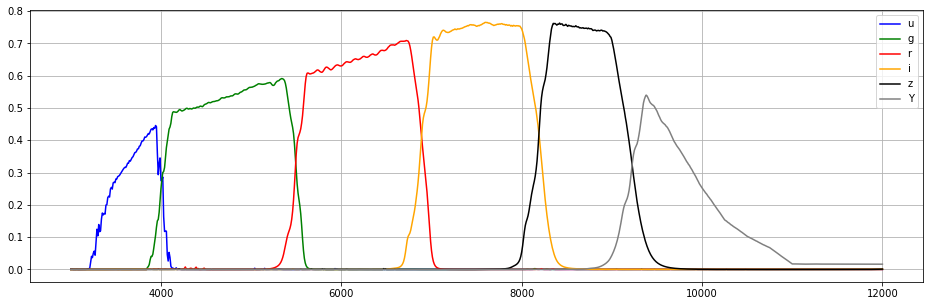

In [22]:
fig=plt.figure(figsize=(16,5))
for index in range(len(lsst_bp)):
    plt.plot(lsst_bp[index].wave,lsst_bp[index].throughput,label=filter_names[index],color=filter_colors[index])
    
plt.grid()
plt.legend()
plt.show()

In [23]:
for filter in lsst_bp:
    assert (filter.wave==lsst_bp[0].wave).all()

In [24]:
wl_lsst = lsst_bp[0].wave

# Load simulated transparencies 

In [25]:
t_file = 'simulated_transparencies_varying_pwv.fits'
t_file_ref = 'simulated_transparencies_varying_pwv_ref.fits'
t_path = './simulated_transparencies'
t_in = os.path.join(t_path,t_file)
t_in_ref = os.path.join(t_path,t_file_ref)
t = fits.open(t_in)
t_ref = fits.open(t_in_ref)

In [26]:
head = t[0].header
data = t[0].data
print(data.shape)
data_ref = t_ref[0].data
print(data_ref.shape)

(26, 956)
(2, 956)


In [27]:
n_atmp = head['ID_RES']
n_sim = head['NTRANSP']
print(n_atmp, n_sim)

5 25


In [28]:
wl_t = data[0][n_atmp:]*10.

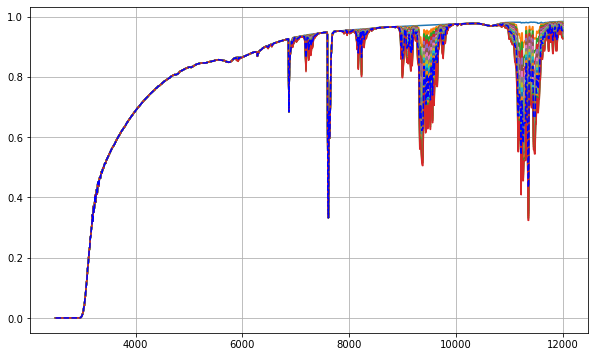

In [29]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for atm_i in range(1,n_sim):
    ax.plot(wl_t,data[atm_i][n_atmp:])
ax.plot(wl_t,data_ref[1][n_atmp:],ls='--',color='b')
plt.grid()

# Check range of simulated atm values

In [30]:
print(head)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  956                                                  NAXIS2  =                   26                                                  NTRANSP =                   25                                                  ID_AM   =                    4                                                  ID_VAOD =                    1                                                  ID_PWV  =                    0                                                  ID_O3   =                    2                                                  ID_CLD  =                    3                                                  ID_RES  =                    5                                                  END                                     

In [31]:
data[1:,4]

array([1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2,
       1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2])

(array([ 0.,  0.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0.,  0.,  0.]),
 array([0.7       , 0.78333333, 0.86666667, 0.95      , 1.03333333,
        1.11666667, 1.2       , 1.28333333, 1.36666667, 1.45      ,
        1.53333333, 1.61666667, 1.7       ]),
 <BarContainer object of 12 artists>)

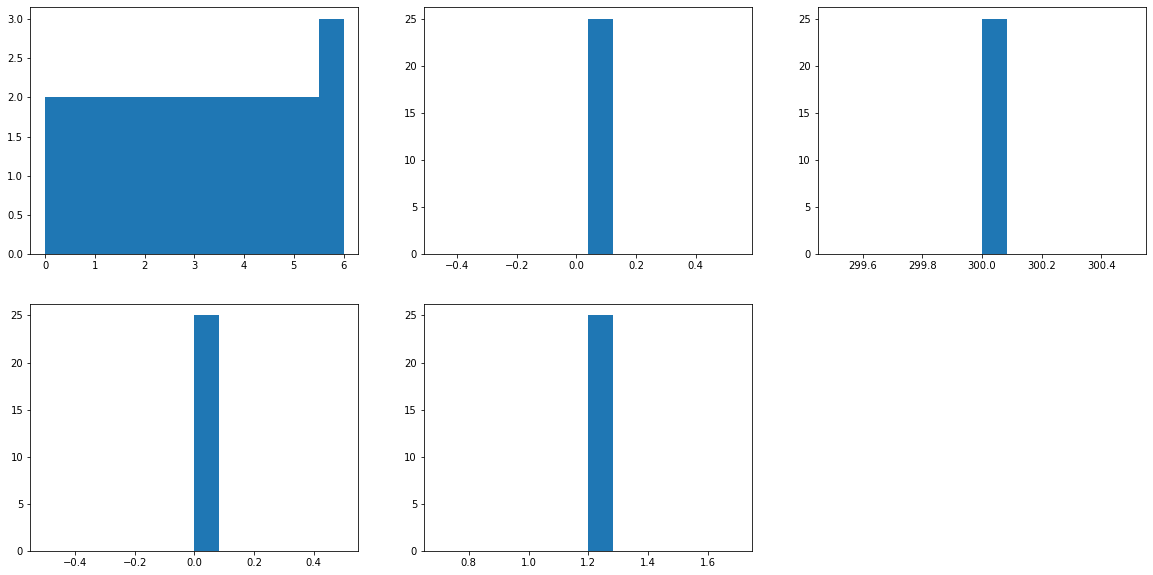

In [32]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(231)
ax2=fig.add_subplot(232)
ax3=fig.add_subplot(233)
ax4=fig.add_subplot(234)
ax5=fig.add_subplot(235)

ax1.hist(data[1:,0],bins=12)
ax2.hist(data[1:,1],bins=12)
ax3.hist(data[1:,2],bins=12)
ax4.hist(data[1:,3],bins=12)
ax5.hist(data[1:,4],bins=12)

In [33]:
atm_vals = data[1:,0]

# Convert simulated transparencies into pysynphot format 

In [34]:
atm_transp = []
for i in range(1,n_sim+1):
    finterp_i = interp1d(wl_t,data[i][n_atmp:],bounds_error=False,fill_value=0.)
    atm_interp_i = finterp_i(wl_lsst)
    #atm_i = S.ArrayBandpass(wl_t,data[i][n_atmp:], name='Atm. transp. {0}'.format(i))
    atm_i = S.ArrayBandpass(wl_lsst,atm_interp_i, name='Atm. transp. {0}'.format(i))
    atm_transp.append(atm_i)

In [35]:
finterp_ref = interp1d(wl_t,data_ref[1][n_atmp:],bounds_error=False,fill_value=0.)
atm_interp_ref = finterp_ref(wl_lsst)
#atm_i = S.ArrayBandpass(wl_t,data[i][n_atmp:], name='Atm. transp. {0}'.format(i))
atm_transp_ref = S.ArrayBandpass(wl_lsst,atm_interp_ref, name='Atm. transp. {0}'.format(i))

# Compute total bandpass (atmosphere(s) x LSST throughput) 

In [36]:
total_passband = {}
#for bpname in filters:
#    total_passband[bpname] = []

for index,bp in enumerate(lsst_bp):
    total_passband[filters[index]] = []
    for i in range(n_sim):
        total_pass = bp*atm_transp[i]
        total_passband[bp.name.upper()].append(total_pass)

In [37]:
total_passband_ref = {}
for index,bp in enumerate(lsst_bp):
    total_pass = bp*atm_transp_ref
    total_passband_ref[bp.name.upper()] = total_pass

In [38]:
print(len(total_passband['U']))
print(total_passband['U'][0])

25
(u * Atm. transp. 1)


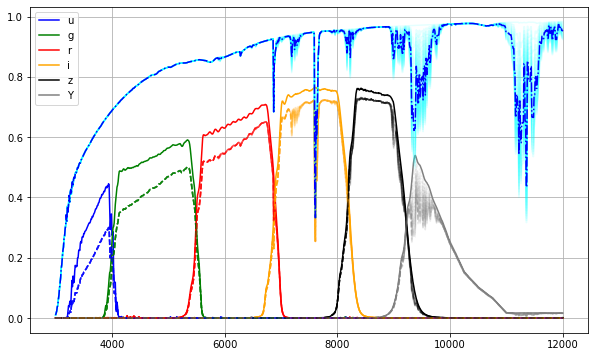

In [39]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for index,bp in enumerate(lsst_bp):
    ax.plot(bp.wave,bp.throughput,label=filter_names[index],color=filter_colors[index])

for isim in range(n_sim):
    ax.plot(atm_transp[isim].wave,atm_transp[isim].throughput,alpha=0.1,color='cyan')
    for index,bpname in enumerate(filters):
        ax.plot(total_passband[bpname][isim].wave,total_passband[bpname][isim].throughput,ls='--',color=filter_colors[index],alpha=0.1)
ax.plot(atm_transp_ref.wave,atm_transp_ref.throughput,ls='-.',color='b')        
plt.grid()
plt.legend()

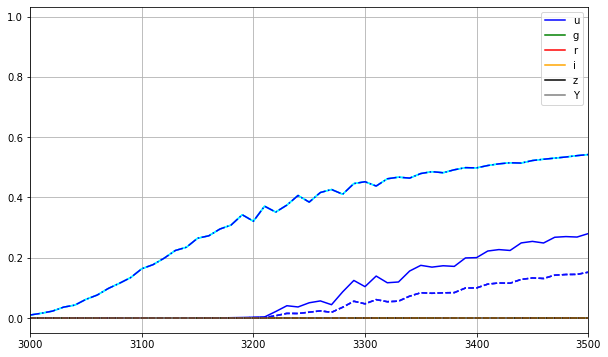

In [40]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for index,bp in enumerate(lsst_bp):
    ax.plot(bp.wave,bp.throughput,label=filter_names[index],color=filter_colors[index])

for isim in range(n_sim):
    ax.plot(atm_transp[isim].wave,atm_transp[isim].throughput,alpha=0.1,color='cyan')
    for index,bpname in enumerate(filters):
        ax.plot(total_passband[bpname][isim].wave,total_passband[bpname][isim].throughput,ls='--',color=filter_colors[index],alpha=0.1)
ax.plot(atm_transp_ref.wave,atm_transp_ref.throughput,ls='-.',color='b')        
plt.xlim(3000.,3500.)
plt.grid()
plt.legend()

(array([3., 2., 3., 2., 2., 3., 2., 3., 2., 3.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

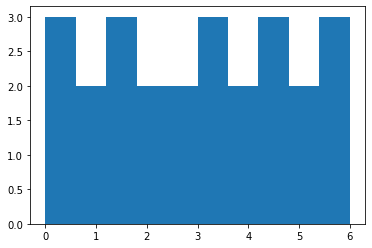

In [41]:
plt.hist(atm_vals)

In [42]:
min_val_ = np.min(atm_vals)
max_val_ = np.max(atm_vals)
print(min_val_,max_val_)

0.0 6.0


In [43]:
min_ind_ = np.where(atm_vals==min_val_)[0][0]
max_ind_ = np.where(atm_vals==max_val_)[0][0]

In [44]:
min_transp = data[1+min_ind_,n_atmp:]
max_transp = data[1+max_ind_,n_atmp:]

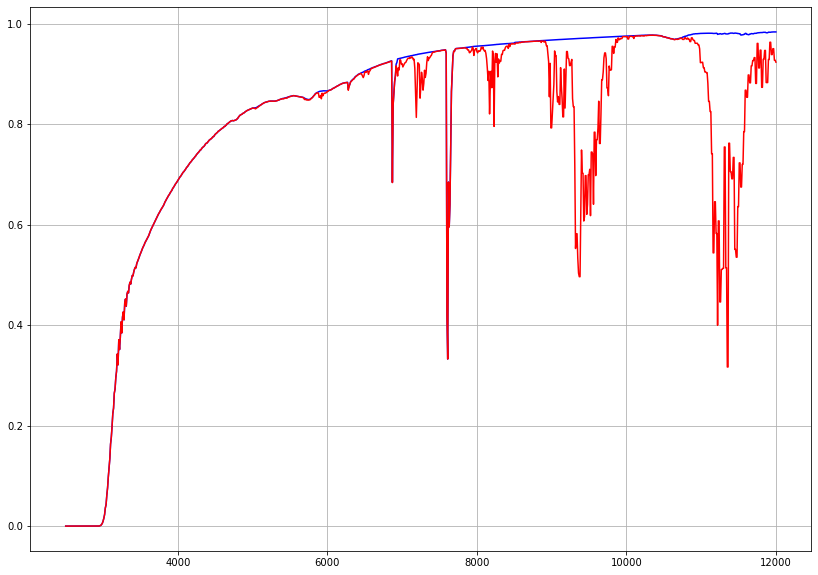

In [45]:
fig=plt.figure(figsize=(14,10))
plt.plot(wl_t,min_transp,color='b')
plt.plot(wl_t,max_transp,color='r')
plt.grid()

/tmp/ipykernel_190062/1989288459.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(wl_t,min_transp/max_transp,color='b')


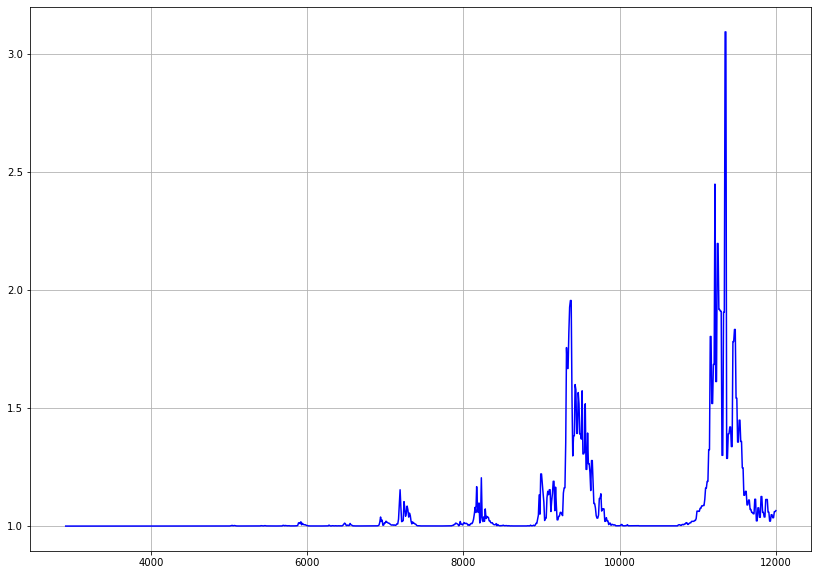

In [46]:
fig=plt.figure(figsize=(14,10))
plt.plot(wl_t,min_transp/max_transp,color='b')
plt.grid()

# Calculate fluxes through total passbands 

In [47]:
# Example with one spectrum (Vega) 
example_spec = 'alpha_lyr_stis_010'
spec = sed_dict[example_spec]
obsatm_dict = {}
for isim in range(n_sim):
    obsatm_dict[isim] = []
    obsatm = S.Observation(spec,atm_transp[isim],force='taper')
    obsatm_dict[isim] = obsatm

obstotal_dict = {}
for filter in filters:
    obstotal_dict[filter] = []

#for filter in lsst_bp:
for filter in filters:
    #print(filter.name.upper())
    for i in range(n_sim):
        #total_pass = filter*atm_transp[i]
        #obs = S.Observation(spec,total_pass,force='taper')
        obstotal = S.Observation(spec,total_passband[filter][i],force='taper')
        obstotal_dict[filter.upper()].append(obstotal)

(Atm. transp. 1) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 2) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 3) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 4) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 5) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 6) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 7) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 8) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Atm. transp. 9) does not have a defined

U
G
R
I
Z
Y
photlam


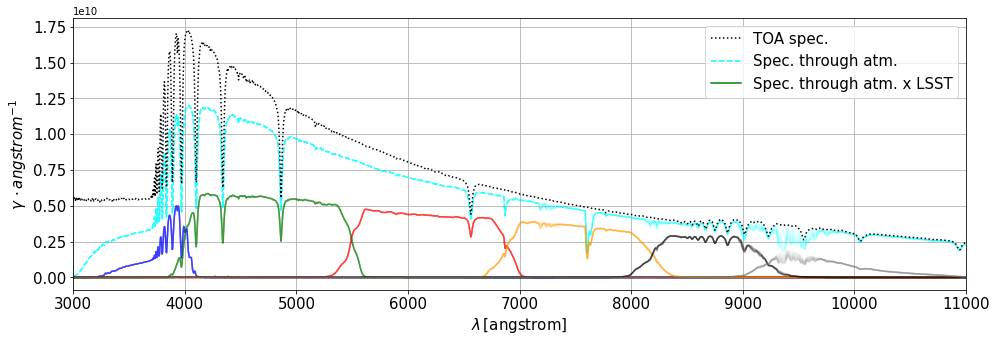

In [48]:
fig=plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)
for isim in range(n_sim):
    obsatm = obsatm_dict[isim]
    ax.plot(obsatm.binwave,obsatm.binflux*Seff*exptime,ls='--',color='cyan',alpha=0.07)

for index,filter in enumerate(obstotal_dict.keys()):
    print(filter)
    for obs in obstotal_dict[filter]:
        #obs.convert('photlam')
        #ax.plot(obs_filter[index].binwave,obs_filter[index].binflux,ls='--',color=filter_colors[index])
        #ax.plot(obs0.binwave,obs0.binflux*Seff*exptime,ls='--',label='Flux through {0}'.format(filter_names[index]),color=filter_colors[index],alpha=0.05)
        #ax.plot(obs.binwave,obsatm.binflux*Seff*exptime,ls='--',label='Flux through {0}'.format(filter_names[index]),color=filter_colors[index],alpha=0.05)
        ax.plot(obs.binwave,obs.binflux*Seff*exptime,ls='-',color=filter_colors[index],alpha=0.05)
plt.plot(spec.wave,spec.flux*Seff*exptime,ls=':',color='k',alpha=1.0)
plt.xlim(WLMIN,WLMAX)
plt.xlabel('$\\lambda \, [$'+str(obs.waveunits)+']',fontsize=15)
plt.ylabel('$\gamma \, \cdot angstrom^{-1}$',fontsize=15)
plt.grid()
plt.plot([],[],ls=':',color='k',label='TOA spec.')
plt.plot([],[],ls='--',color='cyan',label='Spec. through atm.')
plt.plot([],[],ls='-',color='g',label='Spec. through atm. x LSST')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
print(spec.fluxunits)

In [49]:
# Spectra (20) through atm x throughput 
obs_dict = {}
for sed_ in list(sed_dict.keys())[:20]:
    spec = sed_dict[sed_]
    
    filter_dict_ = {}
    for filter in filters:
        filter_dict_[filter] = []
        for i in range(n_sim):
            obs_spec = S.Observation(spec,total_passband[filter][i],force='taper')
            filter_dict_[filter].append(obs_spec)
    obs_dict[sed_] = filter_dict_ 
    
# Add Vega spectrum to the dictionary 
filter_dict_ = {}
for filter in filters:
    filter_dict_[filter] = []
    for i in range(n_sim):
        obs_spec = S.Observation(sed_dict[example_spec],total_passband[filter][i],force='taper')
        filter_dict_[filter].append(obs_spec)
obs_dict[example_spec] = filter_dict_
    



((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

((z * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((Y * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((Y * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((Y * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((Y * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((Y * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((Y * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used

((z * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((r * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((i * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((i * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be 

In [50]:
print(len(sed_dict.keys()))
print(len(obs_dict.keys()))
print(len(obs_dict[example_spec].keys()))
print(obs_dict[example_spec].keys())
print(len(obs_dict[example_spec]['U']))
print(n_sim)

610
21
6
dict_keys(['U', 'G', 'R', 'I', 'Z', 'Y'])
25
25


In [51]:
# Spectra (20) only through throughput (as if telescope was in space) 
obs_dict_t = {}
for sed_ in list(sed_dict.keys())[:20]:
    spec = sed_dict[sed_]
    
    filter_dict_ = {}
    for filter in lsst_bp:
        obs_spec_t = S.Observation(spec,filter,force='taper')
        filter_dict_[filter.name.upper()] = obs_spec_t
    obs_dict_t[sed_] = filter_dict_ 
    
# Add Vega spectrum to the dictionary 
filter_dict_ = {}
for filter in lsst_bp:
    obs_spec_t = S.Observation(sed_dict[example_spec],filter,force='taper')
    filter_dict_[filter.name.upper()] = obs_spec_t
obs_dict_t[example_spec] = filter_dict_

(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in

(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in

In [52]:
print(len(sed_dict.keys()))
print(len(obs_dict_t.keys()))
print(len(obs_dict_t[example_spec].keys()))
print(obs_dict_t[example_spec].keys())

610
21
6
dict_keys(['U', 'G', 'R', 'I', 'Z', 'Y'])


In [53]:
obs_dict_t[example_spec]['U']

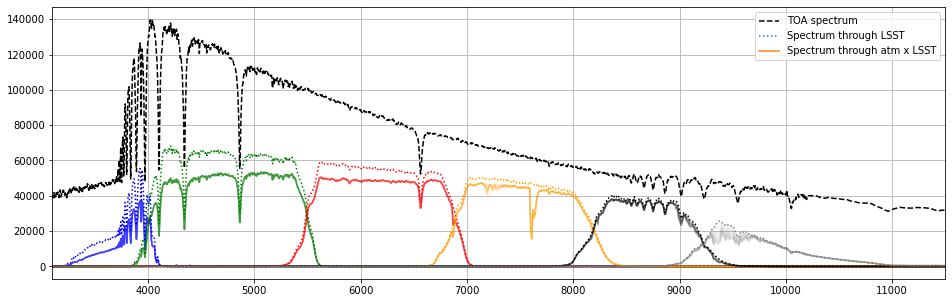

In [54]:
# Check with another spectrum 
example_spec2 = '1740346_stisnic_002'
sed_dict[example_spec2].convert('photlam')
fig=plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)
#plt.plot(sed_dict[example_spec].wave,sed_dict[example_spec].flux*Seff*exptime,color='b')
plt.plot(sed_dict[example_spec2].wave,sed_dict[example_spec2].flux*Seff*exptime,ls='--',color='k',label='TOA spectrum')

for index,filter in enumerate(filters):
    #plt.plot(obs_dict_t[example_spec][filter].wave,obs_dict_t[example_spec][filter].flux*Seff*exptime,ls=':',color=filter_colors[index])
    plt.plot(obs_dict_t[example_spec2][filter].wave,obs_dict_t[example_spec2][filter].flux*Seff*exptime,ls=':',color=filter_colors[index])
    
    for i in range(n_sim):
        obs_ = obs_dict[example_spec][filter][i]
        #plt.plot(obs_.wave,obs_.flux*Seff*exptime,ls='-',color=filter_colors[index],alpha=0.05)
        obs_2 = obs_dict[example_spec2][filter][i]
        plt.plot(obs_2.wave,obs_2.flux*Seff*exptime,ls='-',color=filter_colors[index],alpha=0.05)
plt.plot([],[],ls=':',label='Spectrum through LSST')
plt.plot([],[],ls='-',label='Spectrum through atm x LSST')
#plt.xlim(WLMIN,WLMAX)
plt.xlim(3100,11500)
plt.grid()
plt.legend()

# Calculate magnitudes (tests with Vega) 

In [55]:
# Start with Vega 
vega_spec = sed_dict[example_spec]
vega_spec.convert('photlam')
print(vega_spec.fluxunits)
#vega_spec.convert('vegamag')
#print(vega_spec.fluxunits)

photlam


In [56]:
# vegamag offers a reasonable approximation to many of the conventional photometric systems that use the spectrum 
# of Vega to define magnitude zero in one or more passbands. In broadband photometry, the relevant passband integral 
# is calculated first for the source spectrum and then again for the spectrum of Vega, and the ratio of the two 
# results is converted to a magnitude. This would not be a scientifically meaningful option for spectrophotometry.

In [57]:
vega_dict_ = {}
for filter in lsst_bp:
    vega_obs_ = S.Observation(vega_spec,filter,force='taper')
    vega_dict_[filter.name.upper()] = vega_obs_

(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [58]:
for filter in filters:
    print(vega_dict_[filter].fluxunits)

photlam
photlam
photlam
photlam
photlam
photlam


In [59]:
# This seems quite compatible with zero.... 
for filter in filters:
    print(vega_dict_[filter].effstim('vegamag'))

-1.4885870314174099e-12
-1.8667734025257232e-11
-3.382183422218077e-12
-1.921840464547131e-11
-9.683276402938645e-11
-2.869240844916021e-09


In [60]:
# Flat filter to compare with LSST filters results 
fraction = 1.0
flat_ = np.ones(len(vega_spec.wave))*fraction
flat = S.ArrayBandpass(vega_spec.wave, flat_, name='FlatBandpass')

In [61]:
vega_obsflat = S.Observation(vega_spec,flat,force='taper')

(FlatBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [62]:
vega_obsflat.effstim('vegamag')

-4.110749074470732e-09

In [63]:
print(vega_obsflat.fluxunits)

photlam


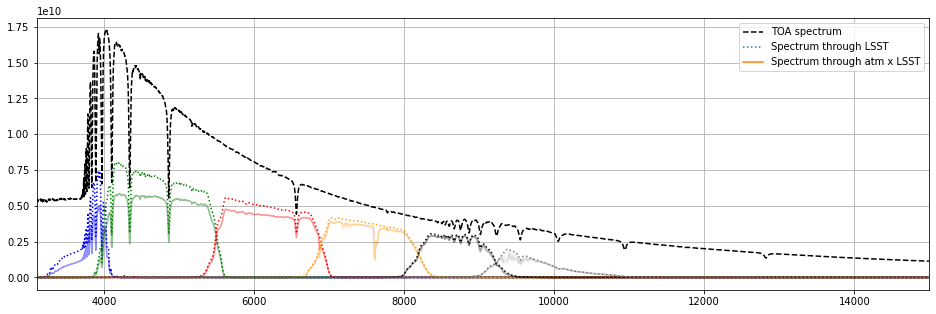

In [64]:
fig=plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)
sed_dict[example_spec].convert('photlam')
plt.plot(sed_dict[example_spec].wave,sed_dict[example_spec].flux*Seff*exptime,ls='--',color='k',label='TOA spectrum')

for index,filter in enumerate(filters):
    plt.plot(obs_dict_t[example_spec][filter].wave,obs_dict_t[example_spec][filter].flux*Seff*exptime,ls=':',color=filter_colors[index])
    
    for i in range(n_sim):
        obs_ = obs_dict[example_spec][filter][i]
        plt.plot(obs_.wave,obs_.flux*Seff*exptime,ls='-',color=filter_colors[index],alpha=0.02)
#plt.xlim(WLMIN,WLMAX)
plt.plot([],[],ls=':',label='Spectrum through LSST')
plt.plot([],[],ls='-',label='Spectrum through atm x LSST')
plt.xlim(3100,15000)
plt.grid()
plt.legend()

In [65]:
# Magnitudes of Vega passing through atm x throughput 
vega_obs = obs_dict[example_spec]
abmag_dict = {}
vegamag_dict = {}
bad_mag = False
for filter in filters:
    abmag_dict[filter] = []
    for i in range(n_sim):
        try:
            abmag_dict[filter].append(vega_obs[filter][i].effstim("abmag"))
        except:
            bad_mag = True
            pass
        
    print('--------')
    vegamag_dict[filter] = []
    for i in range(n_sim):
        try:
            vegamag_dict[filter].append(vega_obs[filter][i].effstim("vegamag"))
        
        except:
            bad_mag = True
            pass
        

--------
--------
--------
--------
--------
--------


In [66]:
# Magnitudes of spectra passing only through throughput 
vega_obs_t = obs_dict_t[example_spec]

abmag_dict_t = {}
vegamag_dict_t = {}
bad_mag = False
for filter in filters:
    try:
        abmag_dict_t[filter] = vega_obs_t[filter].effstim("abmag")
    except:
        #print(sed_)
        bad_mag = True
        pass
    print('--------')
    try:
        vegamag_dict_t[filter] = vega_obs_t[filter].effstim("vegamag")
    except:
        #print(sed_)
        bad_mag = True
        pass


--------
--------
--------
--------
--------
--------


In [67]:
print(abmag_dict_t)

{'U': 0.5209051002798617, 'G': -0.10484248189391998, 'R': 0.1458491137311153, 'I': 0.3710271433560184, 'Z': 0.5078270096611455, 'Y': 0.41339222834583644}


Text(0, 0.5, 'Y')

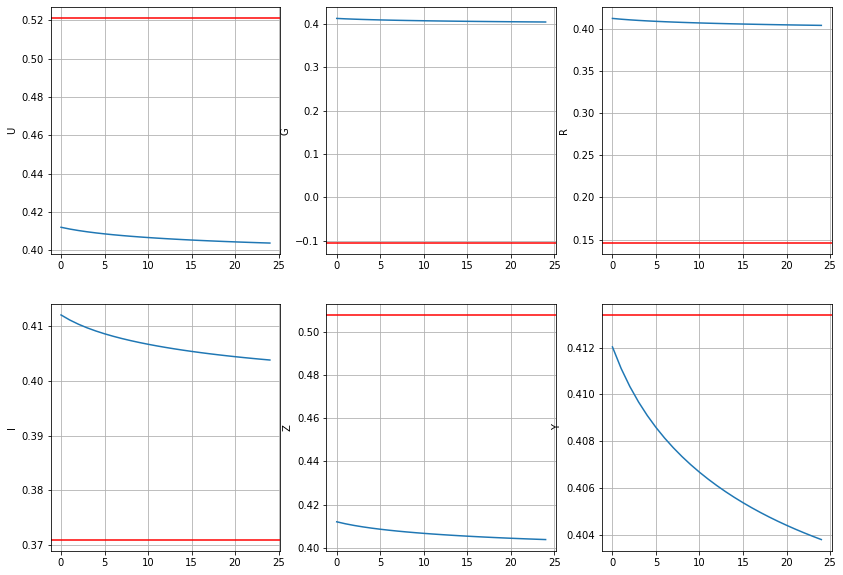

In [68]:
fig = plt.figure(figsize=(14,10))
ax=fig.add_subplot(231)
ax.plot(np.arange(len(abmag_dict['U'])),abmag_dict[filter])
ax.axhline(y=abmag_dict_t['U'],color='r')
ax.grid()
ax.set_ylabel('U')

ax=fig.add_subplot(232)
ax.plot(np.arange(len(abmag_dict['G'])),abmag_dict[filter])
ax.axhline(y=abmag_dict_t['G'],color='r')
ax.grid()
ax.set_ylabel('G')

ax=fig.add_subplot(233)
ax.plot(np.arange(len(abmag_dict['R'])),abmag_dict[filter])
ax.axhline(y=abmag_dict_t['R'],color='r')
ax.grid()
ax.set_ylabel('R')

ax=fig.add_subplot(234)
ax.plot(np.arange(len(abmag_dict['I'])),abmag_dict[filter])
ax.axhline(y=abmag_dict_t['I'],color='r')
ax.grid()
ax.set_ylabel('I')

ax=fig.add_subplot(235)
ax.plot(np.arange(len(abmag_dict['Z'])),abmag_dict[filter])
ax.axhline(y=abmag_dict_t['Z'],color='r')
ax.grid()
ax.set_ylabel('Z')

ax=fig.add_subplot(236)
ax.plot(np.arange(len(abmag_dict['Y'])),abmag_dict[filter])
ax.axhline(y=abmag_dict_t['Y'],color='r')
ax.grid()
ax.set_ylabel('Y')

# Calculate magnitudes with my own function 

Physical constants 

In [69]:
c = S.units.C #speed of light [Angstrom /s] 
print(c)
h = S.units.H #Planck's constant [erg*s] 
print(h)

2.99792458e+18
6.6262e-27


In [70]:
# Reference flux value for an AB source in erg / s / cm2 / Hz 
f_ref = 3.63*10**(-20)

In [71]:
# Pivot wavelength [cm] 
wl_piv = 5.4929*10**(-5)

In [72]:
C = f_ref/(h*wl_piv*10**8.)
print(C)

997.3334660532323


Definition of functions 

In [73]:
# The SED of an AB source (that is, constant flux in frequency units) expressed in photons / s / cm^2 / Angstrom 
def ABnphot(wl):
    #return 997.2*5500./wl
    return C*wl_piv*10**8./wl

In [74]:
def myAB(spec,passband,filter):
    f_units = str(spec.fluxunits)
    if f_units!='flam':
        print('ATTENTION: converting flux units to flam')
        spec.convert('flam')
        
    observation = S.Observation(spec,passband,force='taper')
    num = np.trapz(observation.flux/observation.wave,x=observation.wave)
    #obmag = -2.5*np.log10(num)
    
    spec.convert('photlam')
    
    #print(num)
    
    #flatsp = S.FlatSpectrum(f_ref,fluxunits='fnu')
    #flatsp_vals = np.ones(len(spec.wave))*f_ref
    #flatsp = S.ArraySpectrum(spec.wave,flatsp_vals)
    
    flatsp_nphot = ABnphot(spec.wave)
    flatsp_ = S.ArraySpectrum(spec.wave, flatsp_nphot, name='Flat AB spectrum')
    
    flatsp_.convert('flam')
    ab_obs = S.Observation(flatsp_,filter,force='taper')
    den = np.trapz(ab_obs.flux/ab_obs.wave,x=ab_obs.wave)
    
    #print(den)
    #print(num/den)
    #print(obmag)
    mab = -2.5*np.log10(num/den)
    print(mab)
    return mab

In [75]:
# This function gives the flux of an AB source in photons / s / cm^2 / Angstrom 
flatsp_nphot = ABnphot(vega_spec.wave)

In [76]:
#Let's write this in pysynphot format (note that the result will be in photlam units, then we use ABnphot as input)
flatsp = S.ArraySpectrum(vega_spec.wave, flatsp_nphot, name='Flat AB spectrum')

In [77]:
flatsp.fluxunits

photlam


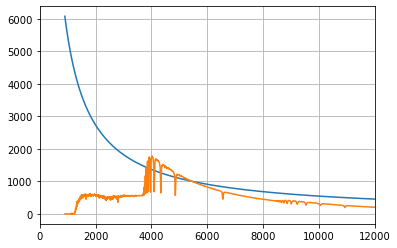

In [78]:
print(flatsp.fluxunits)
flatsp.convert('photlam')
vega_spec.convert('photlam')
plt.plot(flatsp.wave,flatsp.flux)
plt.plot(vega_spec.wave,vega_spec.flux)
plt.xlim(0.,12000.)
plt.grid()

In [79]:
flatsp0 = S.FlatSpectrum(f_ref,fluxunits='fnu')
flatsp0.fluxunits

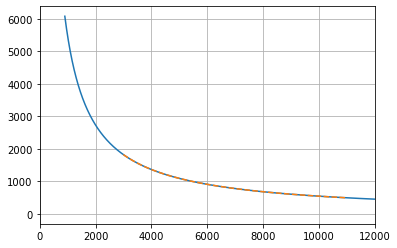

In [80]:
# Here we verify that creating a pysynphot AB flat spectrum and transforming it to photlam gives the same as 
# directly creating the same spectrum in photlam units with ABnphot 
flatsp0.convert('photlam')
plt.plot(flatsp.wave,flatsp.flux)
plt.plot(flatsp0.wave,flatsp0.flux,ls='--')
plt.xlim(0.,12000.)
plt.grid()

To further check it, let's transform it to flam and compare with the analytical expression: 

$$F_{\lambda} = F_{\nu} \frac{c}{\lambda^2}$$

In [81]:
flambda = f_ref*c/flatsp.wave**2.

In [82]:
flatsp.convert('flam')
flatsp.waveunits

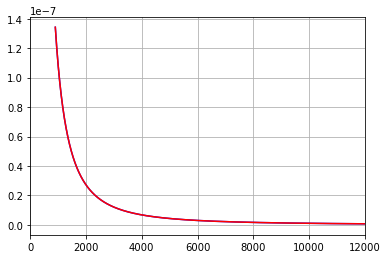

In [83]:
plt.plot(flatsp.wave,flatsp.flux,color='b')
plt.plot(flatsp.wave,flambda,color='r')
plt.xlim(0.,12000.)
plt.grid()
flatsp.convert('photlam')

Now we check that the AB magnitudes are zero for the flat AB spectrum (they have to be through any filter, by definition) 

In [84]:
for filter in lsst_bp:
    myAB(flatsp,filter,filter)

ATTENTION: converting flux units to flam
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.0
ATTENTION: converting flux units to flam
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.0
ATTENTION: converting flux units to flam
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.0
ATTENTION: converting flux units to flam
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of 

We check the same for the total passband 

In [85]:
for fi,filter in enumerate(filters):
    myAB(flatsp,total_passband[filter][0],lsst_bp[fi])

ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.6532673307343134
ATTENTION: converting flux units to flam
((g * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.26121234925606984
ATTENTION: converting flux units to flam
((r * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.14092811435293934
ATTENTION: converting flux units to flam
((i * Atm. transp. 1)) does not have a defined binset in the wavecat table. Th

Now, let's see the AB magnitudes of Vega with myAB function. To better understand it, compare the AB spectrum and Vega spectrum flux amplitudes in each range of wavelengths (see plot below) 

photlam


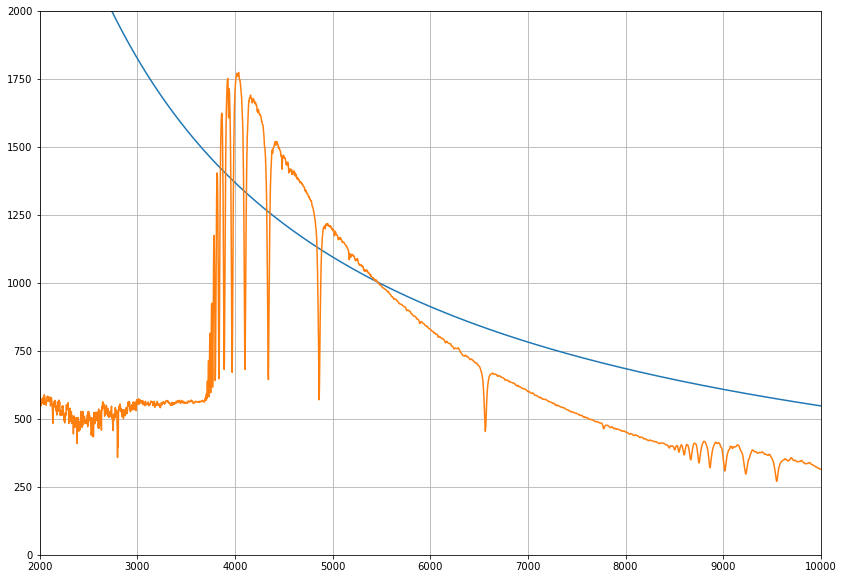

In [86]:
print(flatsp.fluxunits)
flatsp.convert('photlam')
vega_spec.convert('photlam')
plt.figure(figsize=(14,10))
plt.plot(flatsp.wave,flatsp.flux)
plt.plot(vega_spec.wave,vega_spec.flux)
plt.xlim(2000.,10000.)
plt.ylim(0.,2000.)
plt.grid()

In [87]:
for filter in lsst_bp:
    myAB(vega_spec,filter,filter)

ATTENTION: converting flux units to flam
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.6534927209069824
ATTENTION: converting flux units to flam
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.11342226644888148
ATTENTION: converting flux units to flam
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.13345518503434384
ATTENTION: converting flux units to flam
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined

In [88]:
for fi,filter in enumerate(filters):
    myAB(vega_spec,total_passband[filter][0],lsst_bp[fi])

ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
1.1805656940362903
ATTENTION: converting flux units to flam
((g * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.15061653177068704
ATTENTION: converting flux units to flam
((r * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.2767615045611015
ATTENTION: converting flux units to flam
((i * Atm. transp. 1)) does not have a defined binset in the wavecat table. The

# Calculate magnitudes and colours

In [89]:
# Magnitudes of spectra passing through atm x throughput 
mag_dict = {}
mag_dict_ref = {}
for sed_ in list(sed_dict.keys())[:20]:
    obs_spec_ = sed_dict[sed_]
    
    mag_dict_ = {}
    mag_dict_ref_ = {}
    bad_mag = False
    for fi,filter in enumerate(filters):
        mag_dict_[filter] = []
        for i in range(n_sim):
            try:
                #mag_dict_[filter].append(obs_spec_[filter][i].effstim("abmag"))
                mag_ab_ = myAB(obs_spec_,total_passband[filter][i],lsst_bp[fi])
                mag_dict_[filter].append(mag_ab_)
            
            except:
                #print(sed_)
                bad_mag = True
                pass
            
            if bad_mag==False:
                mag_dict[sed_] = mag_dict_
                
        mag_ab_ = myAB(obs_spec_,total_passband_ref[filter],lsst_bp[fi])
        mag_dict_ref_[filter] = mag_ab_
    mag_dict_ref[sed_] = mag_dict_ref_
        
# Add Vega to the dictionary
bad_mag = False
mag_dict_ = {}
mag_dict_ref_ = {}
for fi,filter in enumerate(filters):
    mag_dict_[filter] = []
    for i in range(n_sim):
        try:
            mag_ab_ = myAB(sed_dict[example_spec],total_passband[filter][i],lsst_bp[fi])
            mag_dict_[filter].append(mag_ab_)
        except:
            bad_mag = True
            pass
        if bad_mag==False:
            mag_dict[example_spec] = mag_dict_
            
    mag_ab_ = myAB(sed_dict[example_spec],total_passband_ref[filter],lsst_bp[fi])
    mag_dict_ref_[filter] = mag_ab_
mag_dict_ref[example_spec] = mag_dict_ref_

ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.777642914086773
ATTENTION: converting flux units to flam
((u * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.777642237676762
ATTENTION: converting flux units to flam
((u * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.777641443912568
ATTENTION: converting flux units to flam
((u * Atm. transp. 4)) does not have a defined binset in the wavecat table. The 

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.64771217359641
ATTENTION: converting flux units to flam
((g * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.647720157771026
ATTENTION: converting flux units to flam
((g * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.647728073447988
ATTENTION: converting flux units to flam
((g * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.64773593777859

(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.049740212837968
ATTENTION: converting flux units to flam
((r * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.049820113934553
ATTENTION: converting flux units to flam
((r * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.049913597275083
ATTENTION: converting flux units to flam
((r * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.050033197929

(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.669582613162918
ATTENTION: converting flux units to flam
((z * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.67090401511658
ATTENTION: converting flux units to flam
((z * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.67220344592028
ATTENTION: converting flux units to flam
((z * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.67350223682977

13.895228989673976
ATTENTION: converting flux units to flam
((u * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.89522633339043
ATTENTION: converting flux units to flam
((u * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.895223526481725
ATTENTION: converting flux units to flam
((u * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.895220508656571
ATTENTION: converting flux units to flam
((u * Atm. transp. 16)) does not have a defined binset in t

(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.666248202406527
ATTENTION: converting flux units to flam
((r * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.666325202588457
ATTENTION: converting flux units to flam
((r * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.666402132403686
ATTENTION: converting flux units to flam
((r * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.66647899974

(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.734880876699853
ATTENTION: converting flux units to flam
((i * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.735544201508436
ATTENTION: converting flux units to flam
((i * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.736202366591503
ATTENTION: converting flux units to flam
((i * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.73685549

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.883566697967808
ATTENTION: converting flux units to flam
((Y * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.893398010507351
ATTENTION: converting flux units to flam
((Y * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.902455078639385
ATTENTION: converting flux units to flam
((Y * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.91089169889

(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.55554595796002
ATTENTION: converting flux units to flam
((u * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.555543348708198
ATTENTION: converting flux units to flam
((u * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.55554059122228
ATTENTION: converting flux units to flam
((u * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.55553756575082

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.292741800194946
ATTENTION: converting flux units to flam
((g * Atm. transp. 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.29274827389135
ATTENTION: converting flux units to flam
((g * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.29275467064612
ATTENTION: converting flux units to flam
((g * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.29276097565506

((r * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.7936531573137895
ATTENTION: converting flux units to flam
((i * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.650298290996399
ATTENTION: converting flux units to flam
((i * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.651050584391945
ATTENTION: converting flux units to flam
((i * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used inste

7.612550230737458
ATTENTION: converting flux units to flam
((z * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.614234480662291
ATTENTION: converting flux units to flam
((z * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.615873358616188
ATTENTION: converting flux units to flam
((z * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.617471058269266
ATTENTION: converting flux units to flam
((z * Atm. transp. 12)) does not have a defined binset in the w

7.7516104020935135
ATTENTION: converting flux units to flam
((Y * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.756892123378824
ATTENTION: converting flux units to flam
((Y * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.762037210932519
ATTENTION: converting flux units to flam
((Y * Atm. transp. 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.76705465954159
ATTENTION: converting flux units to flam
((Y * Atm. transp. 21)) does not have a defined binset in the 

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.915358344027268
ATTENTION: converting flux units to flam
((g * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.915364753959269
ATTENTION: converting flux units to flam
((g * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.915371136885048
ATTENTION: converting flux units to flam
((g * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.915377453106

((i * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.365631084066885
ATTENTION: converting flux units to flam
((i * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.366298792202311
ATTENTION: converting flux units to flam
((i * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.366961122179774
ATTENTION: converting flux units to flam
((i * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used ins

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.372760336125653
ATTENTION: converting flux units to flam
((Y * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.380077674230332
ATTENTION: converting flux units to flam
((Y * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.38704815849633
ATTENTION: converting flux units to flam
((Y * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.39371915640465

17.281336444312224
ATTENTION: converting flux units to flam
((g * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.28134157622582
ATTENTION: converting flux units to flam
((g * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.281346680286738
ATTENTION: converting flux units to flam
((g * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.28135174654646
ATTENTION: converting flux units to flam
((g * Atm. transp. 11)) does not have a defined binset in the 

17.51715937503883
ATTENTION: converting flux units to flam
((i * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.51789620497355
ATTENTION: converting flux units to flam
((i * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.518626077812435
ATTENTION: converting flux units to flam
((i * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.519349176966507
ATTENTION: converting flux units to flam
((i * Atm. transp. 10)) does not have a defined binset in the w

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.598885128641683
ATTENTION: converting flux units to flam
((Y * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.611371598609885
ATTENTION: converting flux units to flam
((Y * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.62257365014292
ATTENTION: converting flux units to flam
((Y * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
17.632777210012

11.68473108560753
ATTENTION: converting flux units to flam
((u * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.68466473205999
ATTENTION: converting flux units to flam
((u * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.684577932011543
ATTENTION: converting flux units to flam
((u * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.684797823456073
ATTENTION: converting flux units to flam
((g * Atm. transp. 1)) does not have a defined binset in the

((r * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.14608557937742
ATTENTION: converting flux units to flam
((r * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.146174171945045
ATTENTION: converting flux units to flam
((r * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.146287248745002
ATTENTION: converting flux units to flam
((r * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

((z * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.774020386672053
ATTENTION: converting flux units to flam
((z * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.775265345410716
ATTENTION: converting flux units to flam
((z * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.776512721726226
ATTENTION: converting flux units to flam
((z * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used 

12.835294457280693
ATTENTION: converting flux units to flam
((u * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.83529053124946
ATTENTION: converting flux units to flam
((u * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.835286386301954
ATTENTION: converting flux units to flam
((u * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.835281959908455
ATTENTION: converting flux units to flam
((u * Atm. transp. 20)) does not have a defined binset in t

12.49193289015274
ATTENTION: converting flux units to flam
((r * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.518174310927916
ATTENTION: converting flux units to flam
((r * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.518251508679437
ATTENTION: converting flux units to flam
((r * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.518328621173282
ATTENTION: converting flux units to flam
((r * Atm. transp. 4)) does not have a defined binset in the w

(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.655869956672385
ATTENTION: converting flux units to flam
((i * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.656560009772928
ATTENTION: converting flux units to flam
((i * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.657244121425599
ATTENTION: converting flux units to flam
((i * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.65792243

(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.810925264060721
ATTENTION: converting flux units to flam
((z * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.812166752864885
ATTENTION: converting flux units to flam
((z * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.813409025239258
ATTENTION: converting flux units to flam
((z * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.81467179

(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.769105663730112
ATTENTION: converting flux units to flam
((u * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.769102866384678
ATTENTION: converting flux units to flam
((u * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.769099974652102
ATTENTION: converting flux units to flam
((u * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.769096923

12.183409304911194
ATTENTION: converting flux units to flam
((r * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.18348440011917
ATTENTION: converting flux units to flam
((r * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.183559477780953
ATTENTION: converting flux units to flam
((r * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.183634528097683
ATTENTION: converting flux units to flam
((r * Atm. transp. 12)) does not have a defined binset in th

12.74396663311606
ATTENTION: converting flux units to flam
((z * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.74577641922458
ATTENTION: converting flux units to flam
((z * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.747515303236344
ATTENTION: converting flux units to flam
((z * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.749194332001142
ATTENTION: converting flux units to flam
((z * Atm. transp. 8)) does not have a defined binset in the wa

13.04716183033115
ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.36044902457343153
ATTENTION: converting flux units to flam
((u * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.3604507791889049
ATTENTION: converting flux units to flam
((u * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.3604526042165146
ATTENTION: converting flux units to flam
((u * Atm. transp. 4)) does not have a defined binset in t

-1.321517401523542
ATTENTION: converting flux units to flam
((g * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.3215127074325392
ATTENTION: converting flux units to flam
((g * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.321508046523556
ATTENTION: converting flux units to flam
((g * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.3215034286137364
ATTENTION: converting flux units to flam
((g * Atm. transp. 11)) does not have a defined binset in 

(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.186763034921163
ATTENTION: converting flux units to flam
((r * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.1866871555835499
ATTENTION: converting flux units to flam
((r * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.1866112697002749
ATTENTION: converting flux units to flam
((r * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-1.186535

(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.988948286182053
ATTENTION: converting flux units to flam
((i * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.9883100423177271
ATTENTION: converting flux units to flam
((i * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.9876761694712117
ATTENTION: converting flux units to flam
((i * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.987026

(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.856049067655143
ATTENTION: converting flux units to flam
((z * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.8723778489675535
ATTENTION: converting flux units to flam
((Y * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.7875056781514638
ATTENTION: converting flux units to flam
((Y * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
-0.77345859

(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.165201802448358
ATTENTION: converting flux units to flam
((u * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.165199232861909
ATTENTION: converting flux units to flam
((u * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.165196542379555
ATTENTION: converting flux units to flam
((u * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.1651937590

(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.107293466142085
ATTENTION: converting flux units to flam
((r * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.107369752547982
ATTENTION: converting flux units to flam
((r * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.107446000586664
ATTENTION: converting flux units to flam
((r * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.10752220991

((i * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.38103060805204
ATTENTION: converting flux units to flam
((i * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.373138363286518
ATTENTION: converting flux units to flam
((z * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.544657595666044
ATTENTION: converting flux units to flam
((z * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used ins

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.642535399845304
ATTENTION: converting flux units to flam
((Y * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.646202925642356
ATTENTION: converting flux units to flam
((Y * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.649811169757673
ATTENTION: converting flux units to flam
((Y * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.65338075

14.038374897974197
ATTENTION: converting flux units to flam
((g * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.038382435743614
ATTENTION: converting flux units to flam
((g * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.03838991462048
ATTENTION: converting flux units to flam
((g * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.038397351330346
ATTENTION: converting flux units to flam
((g * Atm. transp. 12)) does not have a defined binset in th

13.454014646452737
ATTENTION: converting flux units to flam
((r * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.454094224679345
ATTENTION: converting flux units to flam
((r * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.45418731825559
ATTENTION: converting flux units to flam
((r * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.454306396451267
ATTENTION: converting flux units to flam
((r * Atm. transp. 25)) does not have a defined binset in t

(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.199970297667607
ATTENTION: converting flux units to flam
((z * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.201618900403137
ATTENTION: converting flux units to flam
((z * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.203225985098996
ATTENTION: converting flux units to flam
((z * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.20479507

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.325516513594538
ATTENTION: converting flux units to flam
((Y * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.330202610755347
ATTENTION: converting flux units to flam
((Y * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.334828300632779
ATTENTION: converting flux units to flam
((Y * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.33937945

11.80984352824781
ATTENTION: converting flux units to flam
((u * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.80975672567396
ATTENTION: converting flux units to flam
((u * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.80997665176802
ATTENTION: converting flux units to flam
((g * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.86825836550538
ATTENTION: converting flux units to flam
((g * Atm. transp. 2)) does not have a defined binset in the wa

12.290958218365795
ATTENTION: converting flux units to flam
((r * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.291033460133674
ATTENTION: converting flux units to flam
((r * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.291108673982635
ATTENTION: converting flux units to flam
((r * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.291183889473249
ATTENTION: converting flux units to flam
((r * Atm. transp. 13)) does not have a defined binset in 

12.648843221299517
ATTENTION: converting flux units to flam
((z * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.895471358735577
ATTENTION: converting flux units to flam
((z * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.897616211223834
ATTENTION: converting flux units to flam
((z * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.899623512551674
ATTENTION: converting flux units to flam
((z * Atm. transp. 4)) does not have a defined binset in the 

((Y * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.340957785014535
ATTENTION: converting flux units to flam
((Y * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.276095039417271
ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
15.090373545767278
ATTENTION: converting flux units to flam
((u * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used in

14.810347797462398
ATTENTION: converting flux units to flam
((g * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.810341085466384
ATTENTION: converting flux units to flam
((r * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.932251143330573
ATTENTION: converting flux units to flam
((r * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.93232746314739
ATTENTION: converting flux units to flam
((r * Atm. transp. 3)) does not have a defined binset in the 

((i * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
15.121974403909702
ATTENTION: converting flux units to flam
((z * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
15.271196091156412
ATTENTION: converting flux units to flam
((z * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
15.273386868745751
ATTENTION: converting flux units to flam
((z * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used ins

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
15.655638438966623
ATTENTION: converting flux units to flam
((Y * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
15.591076441963956
ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.215681157038699
ATTENTION: converting flux units to flam
((u * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.215679571376

7.081072216530008
ATTENTION: converting flux units to flam
((g * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.0810766949474075
ATTENTION: converting flux units to flam
((g * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.08108106577026
ATTENTION: converting flux units to flam
((g * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.081080591743128
ATTENTION: converting flux units to flam
((g * Atm. transp. 24)) does not have a defined binset in the 

(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.184068064644453
ATTENTION: converting flux units to flam
((i * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.184736217830415
ATTENTION: converting flux units to flam
((i * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.185399034013109
ATTENTION: converting flux units to flam
((i * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.186056698079

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.433081892006487
ATTENTION: converting flux units to flam
((Y * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.439449172429193
ATTENTION: converting flux units to flam
((Y * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.445599320709643
ATTENTION: converting flux units to flam
((Y * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
7.451552786358

((g * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.83022061662734
ATTENTION: converting flux units to flam
((g * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.830225578514845
ATTENTION: converting flux units to flam
((g * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.830230498470229
ATTENTION: converting flux units to flam
((g * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.

9.93057976057768
ATTENTION: converting flux units to flam
((r * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.930655665762666
ATTENTION: converting flux units to flam
((r * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.93073159492215
ATTENTION: converting flux units to flam
((r * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.930807576896456
ATTENTION: converting flux units to flam
((r * Atm. transp. 19)) does not have a defined binset in the wa

10.194957550906846
ATTENTION: converting flux units to flam
((z * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.196905219075155
ATTENTION: converting flux units to flam
((z * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.198771837027245
ATTENTION: converting flux units to flam
((z * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.20057056391456
ATTENTION: converting flux units to flam
((z * Atm. transp. 8)) does not have a defined binset in the w

((Y * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.407447343997902
ATTENTION: converting flux units to flam
((Y * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.413085779181499
ATTENTION: converting flux units to flam
((Y * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.418570712841484
ATTENTION: converting flux units to flam
((Y * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used 

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.450459087763077
ATTENTION: converting flux units to flam
((g * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.450462552467705
ATTENTION: converting flux units to flam
((g * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.450465952379663
ATTENTION: converting flux units to flam
((g * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.45046928

10.87993273392026
ATTENTION: converting flux units to flam
((r * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.880008087406175
ATTENTION: converting flux units to flam
((r * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.88008349770999
ATTENTION: converting flux units to flam
((r * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.88015898453871
ATTENTION: converting flux units to flam
((r * Atm. transp. 20)) does not have a defined binset in the

((z * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.49415697315426
ATTENTION: converting flux units to flam
((z * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.496290819236194
ATTENTION: converting flux units to flam
((z * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.498288755138976
ATTENTION: converting flux units to flam
((z * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used inste

11.817892229466176
ATTENTION: converting flux units to flam
((Y * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.824925673820484
ATTENTION: converting flux units to flam
((Y * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.831736965711064
ATTENTION: converting flux units to flam
((Y * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.838345232329356
ATTENTION: converting flux units to flam
((Y * Atm. transp. 17)) does not have a defined binset in 

((g * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.831020054426121
ATTENTION: converting flux units to flam
((g * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.83103249476844
ATTENTION: converting flux units to flam
((g * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.831044838935089
ATTENTION: converting flux units to flam
((g * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used in

(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.350365202522429
ATTENTION: converting flux units to flam
((i * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.351096720335729
ATTENTION: converting flux units to flam
((i * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.351820902172678
ATTENTION: converting flux units to flam
((i * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.35253795620

(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.16245973095102
ATTENTION: converting flux units to flam
((z * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.163792759172832
ATTENTION: converting flux units to flam
((z * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.147073122749733
ATTENTION: converting flux units to flam
((Y * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.0042360062

ATTENTION: converting flux units to flam
((u * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.689881827906234
ATTENTION: converting flux units to flam
((u * Atm. transp. 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.689876854424863
ATTENTION: converting flux units to flam
((u * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.689871516195465
ATTENTION: converting flux units to flam
((u * Atm. transp. 22)) does not have a defined binset in the wavecat table. 

(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.130235591171388
ATTENTION: converting flux units to flam
((r * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.130310870776242
ATTENTION: converting flux units to flam
((r * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.130386153470674
ATTENTION: converting flux units to flam
((r * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.13046144

((z * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.711794014282487
ATTENTION: converting flux units to flam
((z * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.713139060338179
ATTENTION: converting flux units to flam
((z * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.714458686397226
ATTENTION: converting flux units to flam
((z * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used ins

12.85761623830531
ATTENTION: converting flux units to flam
((Y * Atm. transp. 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.81354141979831
ATTENTION: converting flux units to flam
((u * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.652990050761371
ATTENTION: converting flux units to flam
((u * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.652988783559463
ATTENTION: converting flux units to flam
((u * Atm. transp. 3)) does not have a defined binset in the w

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.663925941388369
ATTENTION: converting flux units to flam
((g * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.66393291178481
ATTENTION: converting flux units to flam
((g * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.66393980955533
ATTENTION: converting flux units to flam
((g * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.663946655905594
A

9.263087082801055
ATTENTION: converting flux units to flam
((r * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.263165645835139
ATTENTION: converting flux units to flam
((r * Atm. transp. 15)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.263244204356493
ATTENTION: converting flux units to flam
((r * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.2633227823891
ATTENTION: converting flux units to flam
((r * Atm. transp. 17)) does not have a defined binset in the wa

9.058664547691935
ATTENTION: converting flux units to flam
((z * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.060986002666292
ATTENTION: converting flux units to flam
((z * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.063149158843354
ATTENTION: converting flux units to flam
((z * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.065189134397121
ATTENTION: converting flux units to flam
((z * Atm. transp. 5)) does not have a defined binset in the wave

((Y * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.124538000540923
ATTENTION: converting flux units to flam
((Y * Atm. transp. 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.134085386505737
ATTENTION: converting flux units to flam
((Y * Atm. transp. 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.142889726769903
ATTENTION: converting flux units to flam
((Y * Atm. transp. 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead

((u * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.853628495467513
ATTENTION: converting flux units to flam
((u * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.853624163618274
ATTENTION: converting flux units to flam
((u * Atm. transp. 19)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.853619546511673
ATTENTION: converting flux units to flam
((u * Atm. transp. 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used 

13.278930802638786
ATTENTION: converting flux units to flam
((r * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.279006184903261
ATTENTION: converting flux units to flam
((r * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.279081530732615
ATTENTION: converting flux units to flam
((r * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.279156859277153
ATTENTION: converting flux units to flam
((r * Atm. transp. 11)) does not have a defined binset in th

((i * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.624612611203805
ATTENTION: converting flux units to flam
((i * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.625294656569206
ATTENTION: converting flux units to flam
((i * Atm. transp. 13)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.625970944293622
ATTENTION: converting flux units to flam
((i * Atm. transp. 14)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used 

((Y * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.060417486300523
ATTENTION: converting flux units to flam
((Y * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.076173147147596
ATTENTION: converting flux units to flam
((Y * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.09003702036755
ATTENTION: converting flux units to flam
((Y * Atm. transp. 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used inste

1.1805496481687094
ATTENTION: converting flux units to flam
((u * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
1.180547230552824
ATTENTION: converting flux units to flam
((u * Atm. transp. 11)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
1.180544665055613
ATTENTION: converting flux units to flam
((u * Atm. transp. 12)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
1.1805419864616995
ATTENTION: converting flux units to flam
((u * Atm. transp. 13)) does not have a defined binset in th

(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.1506822602825408
ATTENTION: converting flux units to flam
((g * Atm. transp. 16)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.15068663661817833
ATTENTION: converting flux units to flam
((g * Atm. transp. 17)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.15069097380921206
ATTENTION: converting flux units to flam
((g * Atm. transp. 18)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.1506952

((r * Atm. transp. 21)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.27828253220844795
ATTENTION: converting flux units to flam
((r * Atm. transp. 22)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.2783589538498007
ATTENTION: converting flux units to flam
((r * Atm. transp. 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.27844833299428895
ATTENTION: converting flux units to flam
((r * Atm. transp. 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be use

0.46975107662014437
ATTENTION: converting flux units to flam
((z * Atm. transp. 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.5535835694861142
ATTENTION: converting flux units to flam
((z * Atm. transp. 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.5559110070825858
ATTENTION: converting flux units to flam
((z * Atm. transp. 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.5580784299846213
ATTENTION: converting flux units to flam
((z * Atm. transp. 4)) does not have a defined binset in the

(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.7153726755441345
ATTENTION: converting flux units to flam
((Y * Atm. transp. 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.7233934617824314
ATTENTION: converting flux units to flam
((Y * Atm. transp. 9)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.7309861009903107
ATTENTION: converting flux units to flam
((Y * Atm. transp. 10)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0.73821559122

In [90]:
print(len(obs_dict.keys()))
print(len(mag_dict.keys()))
print(len(mag_dict[example_spec]['U']))
print(mag_dict[example_spec]['U'])
print(mag_dict[example_spec]['G'])

21
21
25
[1.1805656940362903, 1.1805639706122206, 1.1805621765027305, 1.1805603086745287, 1.1805583464255882, 1.180556314873627, 1.1805541811094353, 1.1805519777366922, 1.1805496481687094, 1.180547230552824, 1.180544665055613, 1.1805419864616995, 1.1805391705897836, 1.1805362080083173, 1.1805330383591701, 1.180529743030883, 1.1805261820270139, 1.1805224189634784, 1.1805183979495568, 1.180514051088737, 1.1805093631456827, 1.180504263443599, 1.180480192884004, 1.1804198357093285, 1.1803408235237576]
[0.15061653177068704, 0.1506214564383128, 0.15062634636227004, 0.15063119500439257, 0.15063601444144975, 0.15064079055988835, 0.15064555372006513, 0.15065027423093644, 0.15065496133019554, 0.15065960523917182, 0.15066422222659237, 0.15066879305478728, 0.15067331942331624, 0.15067782123075515, 0.1506822602825408, 0.15068663661817833, 0.15069097380921206, 0.15069521862798907, 0.15069940893669675, 0.15070350224950751, 0.15070749536172168, 0.15071137437385018, 0.15071002848395346, 0.1506986222387

In [91]:
print(len(obs_dict.keys()))
print(len(mag_dict_ref.keys()))
mag_dict_ref[example_spec]

21
21


{'U': 1.1805391705897836,
 'G': 0.15067331942331624,
 'R': 0.2776742918577037,
 'I': 0.46975107662014437,
 'Z': 0.5754801064064937,
 'Y': 0.7581728916137108}

In [92]:
# Magnitudes of spectra passing only through throughput 
mag_dict_t = {}
for sed_ in list(sed_dict.keys())[:20]:
    obs_spec_ = sed_dict[sed_]
    
    mag_dict_ = {}
    bad_mag = False
    for index,filter in enumerate(lsst_bp):
        try:
            #mag_dict_[filter] = obs_spec_[filter].effstim("abmag")
            mag_ab_ = myAB(obs_spec_,lsst_bp[index],lsst_bp[index])
            mag_dict_[filters[index]] = mag_ab_
        except:
            #print(sed_)
            bad_mag = True
            pass
    if bad_mag==False:
        mag_dict_t[sed_] = mag_dict_
        
# Add Vega to dictionary 
bad_mag = False
mag_dict_ = {}
for index,filter in enumerate(lsst_bp):
    try:
        mag_ab_ = myAB(sed_dict[example_spec],lsst_bp[index],lsst_bp[index])
        mag_dict_[filters[index]] = mag_ab_
    except:
        bad_mag = True
        pass
    if bad_mag==False:
        mag_dict_t[example_spec] = mag_dict_
        

ATTENTION: converting flux units to flam
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.24046980053948
ATTENTION: converting flux units to flam
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.40046526485429
ATTENTION: converting flux units to flam
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
8.9096403140104
ATTENTION: converting flux units to flam
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset i

11.46290694247719
ATTENTION: converting flux units to flam
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
11.999606556172981
ATTENTION: converting flux units to flam
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.334455829314985
ATTENTION: converting flux units to flam
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.69881599204737
ATTENTION: converting flux units to flam
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not 

12.492548597512322
ATTENTION: converting flux units to flam
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(z) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
12.853757154598057
ATTENTION: converting flux units to flam
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(Y) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
13.135111544659724
ATTENTION: converting flux units to flam
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
14.499550349191502
ATTENTION: converting flux units to flam
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does no

12.70093148300174
ATTENTION: converting flux units to flam
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(u) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
10.109751043150844
ATTENTION: converting flux units to flam
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(g) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.411981205668647
ATTENTION: converting flux units to flam
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(r) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
9.122335390283954
ATTENTION: converting flux units to flam
(i) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(i) does not h

In [93]:
print(len(obs_dict.keys()))
print(len(mag_dict_t.keys()))
print(mag_dict_t[example_spec]['U'])
print(mag_dict_t[example_spec]['G'])

21
21
0.6534927209069824
-0.11342226644888148


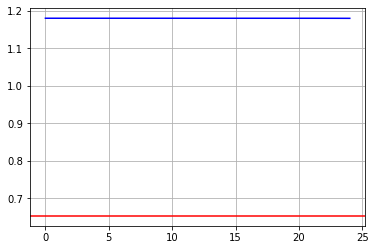

In [94]:
band = 'U'
plt.plot(np.arange(len(mag_dict[example_spec][band])),mag_dict[example_spec][band],color='b')
plt.axhline(y=mag_dict_t[example_spec][band],color='r')
plt.grid()

In [95]:
print(filters)

['U', 'G', 'R', 'I', 'Z', 'Y']


In [96]:
colour_dict = {}
for sed_ in mag_dict.keys():
    c_dict = {}
    for fi in range(len(filters)-1):
        mag1 = np.array(mag_dict[sed_][filters[fi]])
        mag2 = np.array(mag_dict[sed_][filters[fi+1]])
        #print(mag1)
        #print(mag2)
        
        colour_ = mag1-mag2
        colour_name = '{0}-{1}'.format(filters[fi].lower(),filters[fi+1].lower())
        c_dict[colour_name] = colour_
    colour_dict[sed_] = c_dict

In [97]:
print(len(mag_dict.keys()))
print(len(colour_dict.keys()))
print(colour_dict[example_spec].keys())
print(colour_dict[example_spec]['u-g'])
print(len(colour_dict[example_spec]['u-g']))

21
21
dict_keys(['u-g', 'g-r', 'r-i', 'i-z', 'z-y'])
[1.02994916 1.02994251 1.02993583 1.02992911 1.02992233 1.02991552
 1.02990863 1.0299017  1.02989469 1.02988763 1.02988044 1.02987319
 1.02986585 1.02985839 1.02985078 1.02984311 1.02983521 1.0298272
 1.02981899 1.02981055 1.02980187 1.02979289 1.02977016 1.02972121
 1.02965875]
25


In [98]:
colour_dict_ref = {}
for sed_ in mag_dict_ref.keys():
    c_dict = {}
    for fi in range(len(filters)-1):
        mag1 = np.array(mag_dict_ref[sed_][filters[fi]])
        mag2 = np.array(mag_dict_ref[sed_][filters[fi+1]])
        #print(mag1)
        #print(mag2)
        
        colour_ = mag1-mag2
        colour_name = '{0}-{1}'.format(filters[fi].lower(),filters[fi+1].lower())
        c_dict[colour_name] = colour_
    colour_dict_ref[sed_] = c_dict

In [99]:
print(len(mag_dict_ref.keys()))
print(len(colour_dict_ref.keys()))
print(colour_dict_ref[example_spec].keys())
print(colour_dict_ref[example_spec]['u-g'])

21
21
dict_keys(['u-g', 'g-r', 'r-i', 'i-z', 'z-y'])
1.0298658511664673


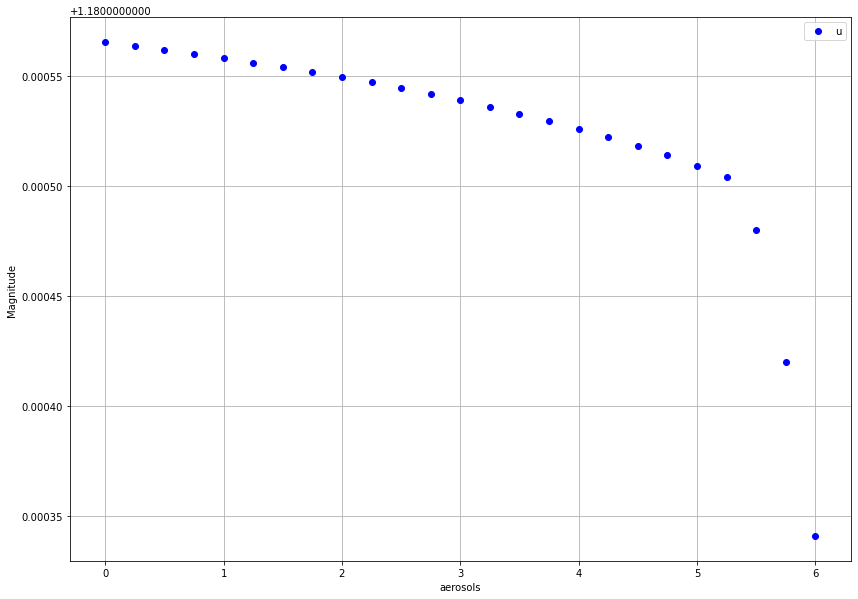

In [100]:
plt.figure(figsize=(14,10))
plt.plot(atm_vals,mag_dict[example_spec]['U'],ls='',marker='o',color='b',label='u')
#plt.plot(atm_vals,mag_dict[example_spec]['G'],ls='',marker='o',color='orange',label='g')
#plt.plot(atm_vals,mag_dict[example_spec]['R'],ls='',marker='o',color='r',label='r')
#plt.plot(atm_vals,mag_dict[example_spec]['I'],ls='',marker='o',color='r',label='i')
#plt.plot(atm_vals,mag_dict[example_spec]['Z'],ls='',marker='o',color='r',label='z')
#plt.plot(atm_vals,mag_dict[example_spec]['Y'],ls='',marker='o',color='r',label='Y')
plt.grid()
plt.xlabel('aerosols')
plt.ylabel('Magnitude')
plt.legend()

In [101]:
mag_dict[example_spec]['U'][min_ind_], mag_dict[example_spec]['U'][max_ind_]

(1.1805656940362903, 1.1803408235237576)

Text(0, 0.5, 'color')

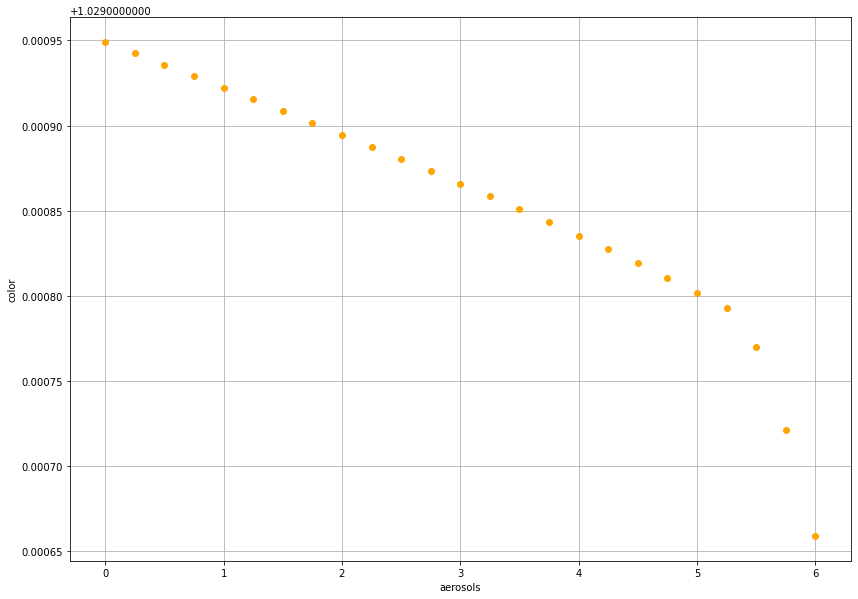

In [102]:
plt.figure(figsize=(14,10))
color_ = np.array(mag_dict[example_spec]['U'])-np.array(mag_dict[example_spec]['G'])
plt.plot(atm_vals,color_,ls='',marker='o',color='orange')
plt.grid()
plt.xlabel('aerosols')
plt.ylabel('color')

Text(0, 0.5, 'color')

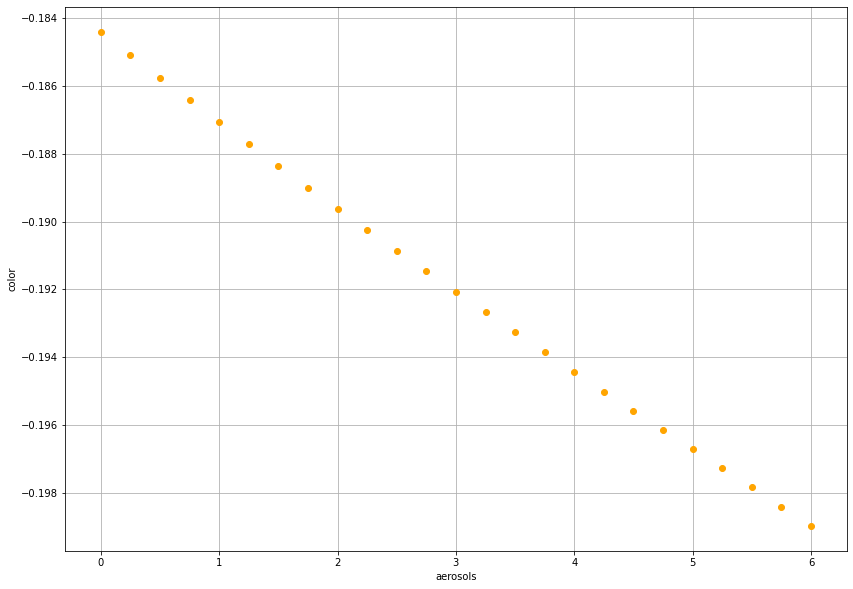

In [103]:
plt.figure(figsize=(14,10))
color_ = np.array(mag_dict[example_spec]['R'])-np.array(mag_dict[example_spec]['I'])
plt.plot(atm_vals,color_,ls='',marker='o',color='orange')
plt.grid()
plt.xlabel('aerosols')
plt.ylabel('color')

Text(0, 0.5, '$\\Delta$(g-r)')

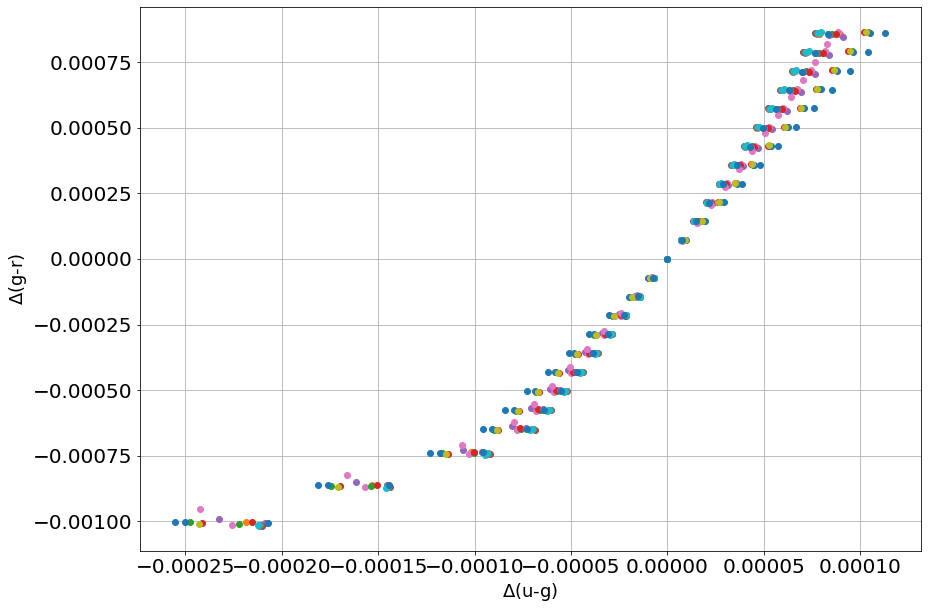

In [104]:
colorx = 'u-g'
colory = 'g-r'
plt.figure(figsize=(14,10))
for sed_ in colour_dict.keys():
    delta1 = colour_dict[sed_]['u-g']-colour_dict_ref[sed_]['u-g']
    delta2 = colour_dict[sed_]['g-r']-colour_dict_ref[sed_]['g-r']
    plt.plot(delta1,delta2,ls='',marker='o')
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$\Delta$'+'('+colorx+')',fontsize=18)
plt.ylabel(r'$\Delta$'+'('+colory+')',fontsize=18)
#plt.savefig('delta_colours_test.png')

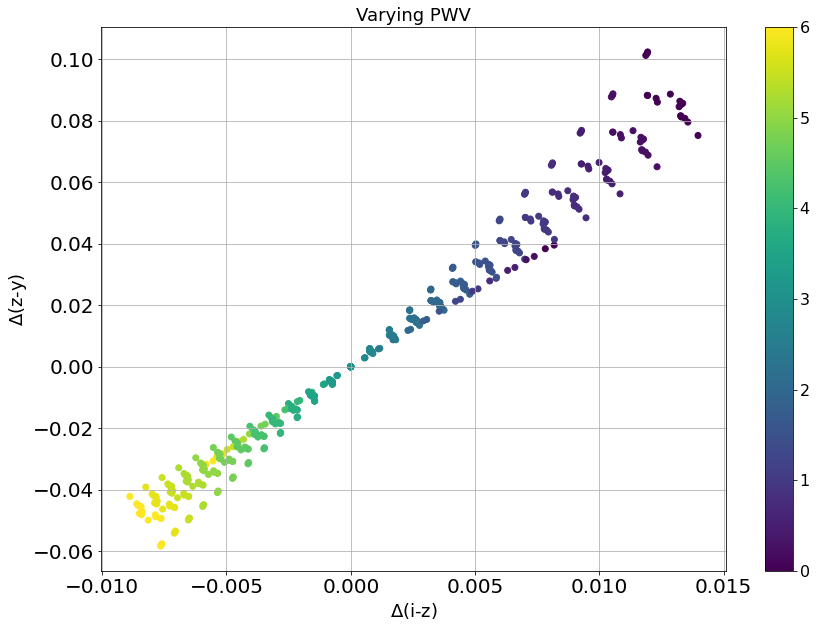

In [116]:
colorx = 'i-z'
colory = 'z-y'
plt.figure(figsize=(14,10))
for sed_ in list(colour_dict.keys()):
    delta1 = colour_dict[sed_][colorx]-colour_dict_ref[sed_][colorx]
    delta2 = colour_dict[sed_][colory]-colour_dict_ref[sed_][colory]
    plt.scatter(delta1,delta2,c=atm_vals)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$\Delta$'+'('+colorx+')',fontsize=18)
plt.ylabel(r'$\Delta$'+'('+colory+')',fontsize=18)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.title('Varying PWV',fontsize=18)
plt.savefig('delta_colours_test_pwv.png')

/tmp/ipykernel_190062/4178999933.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,10))


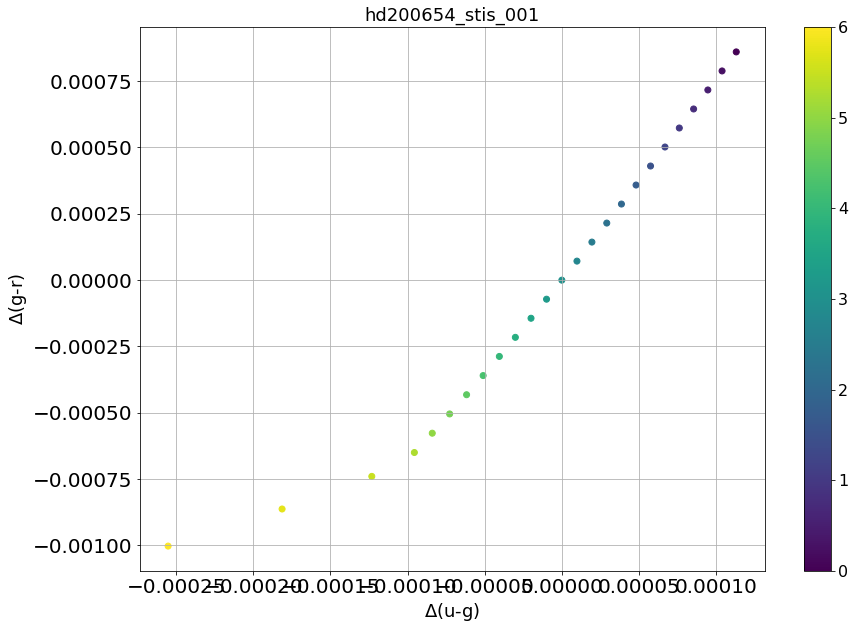

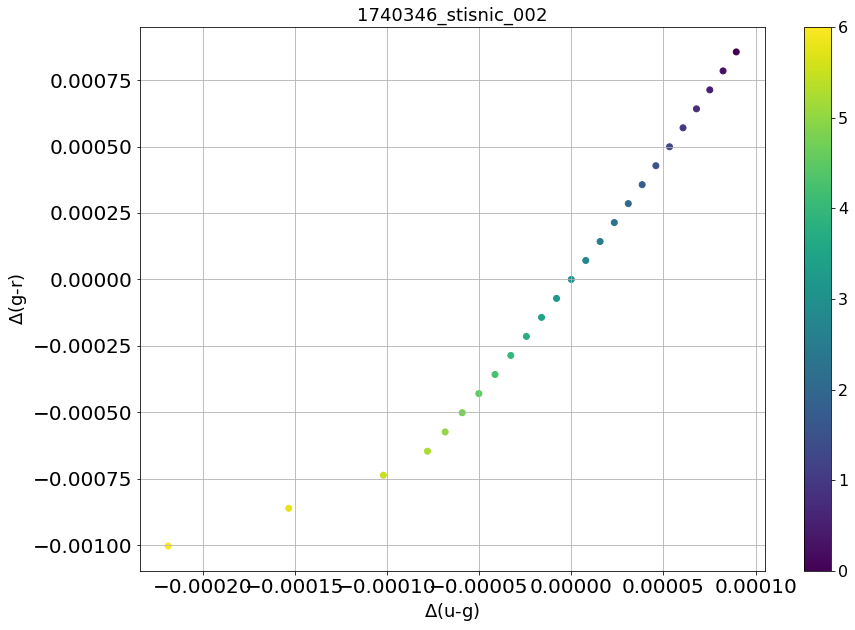

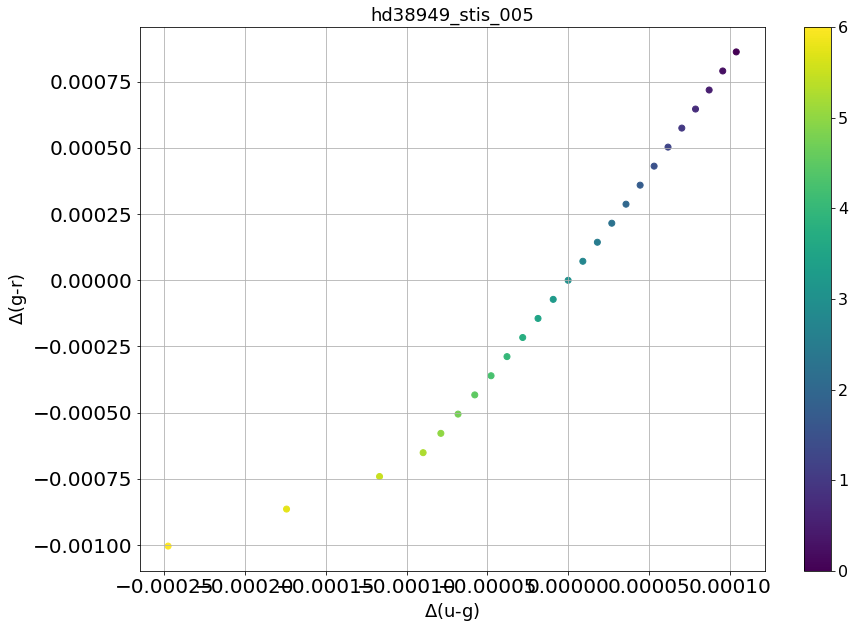

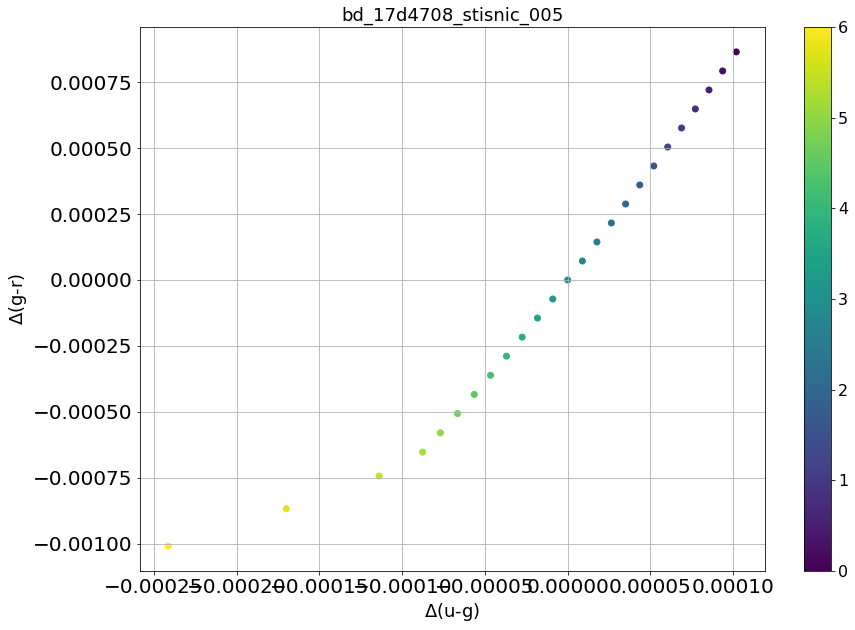

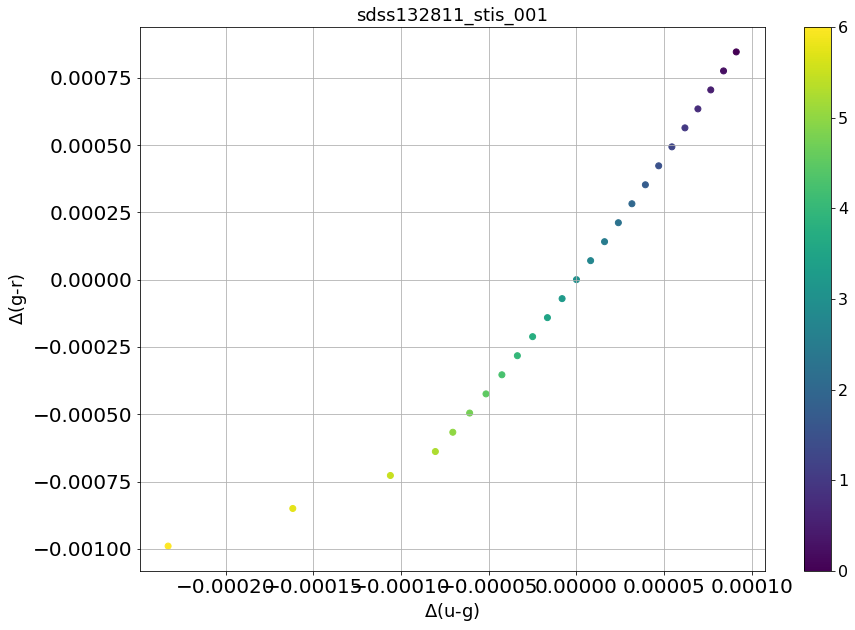

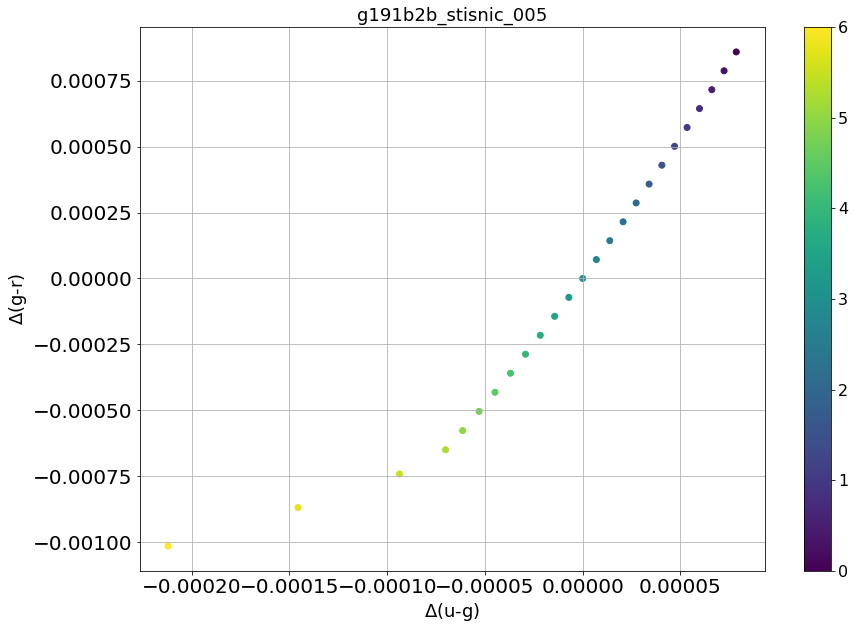

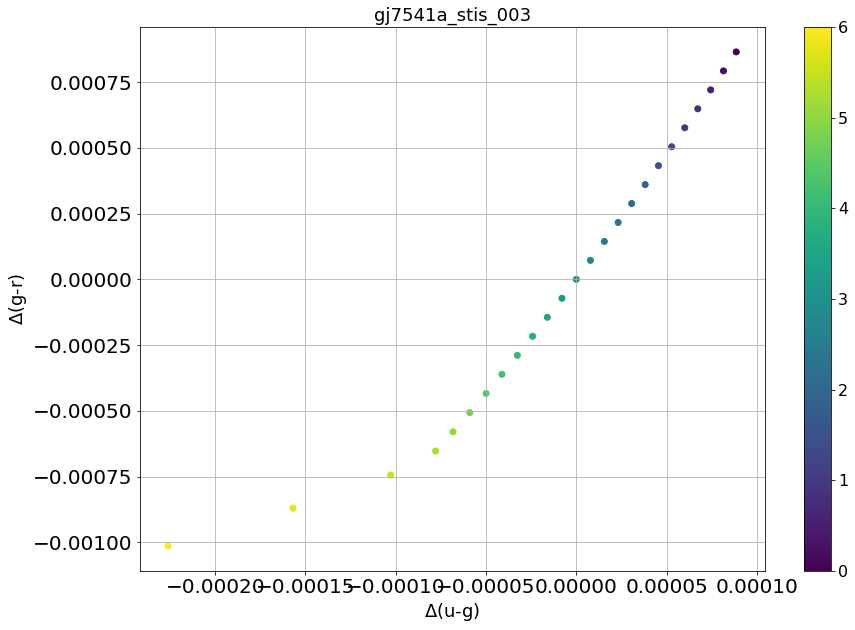

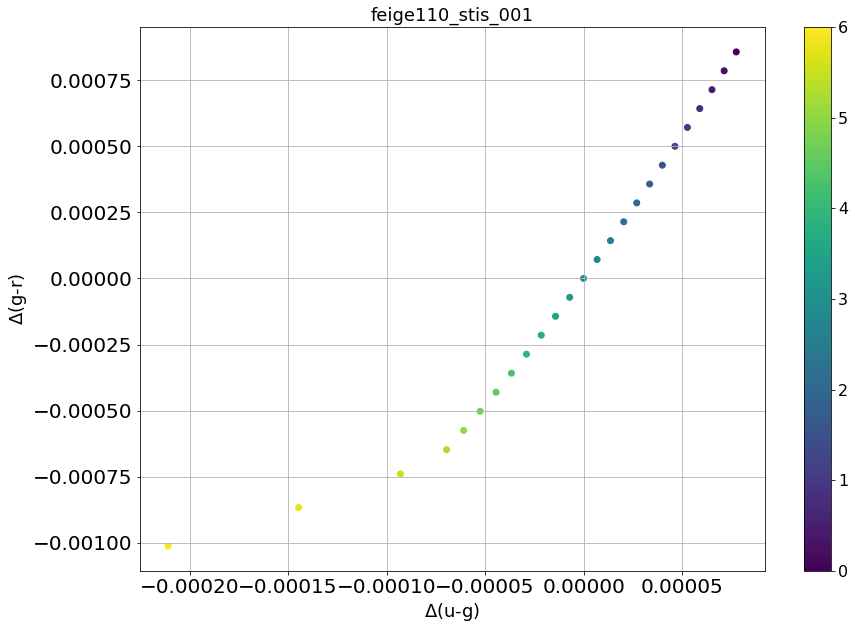

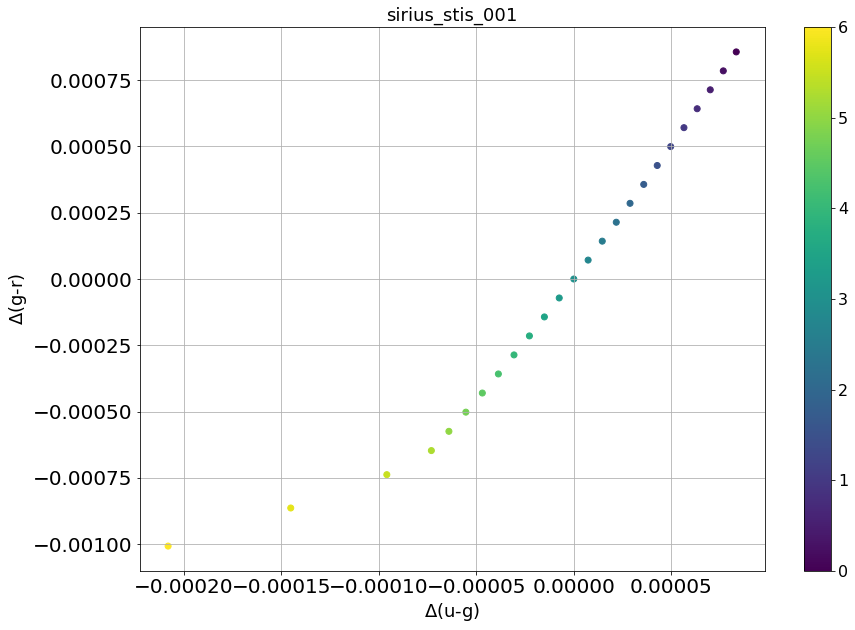

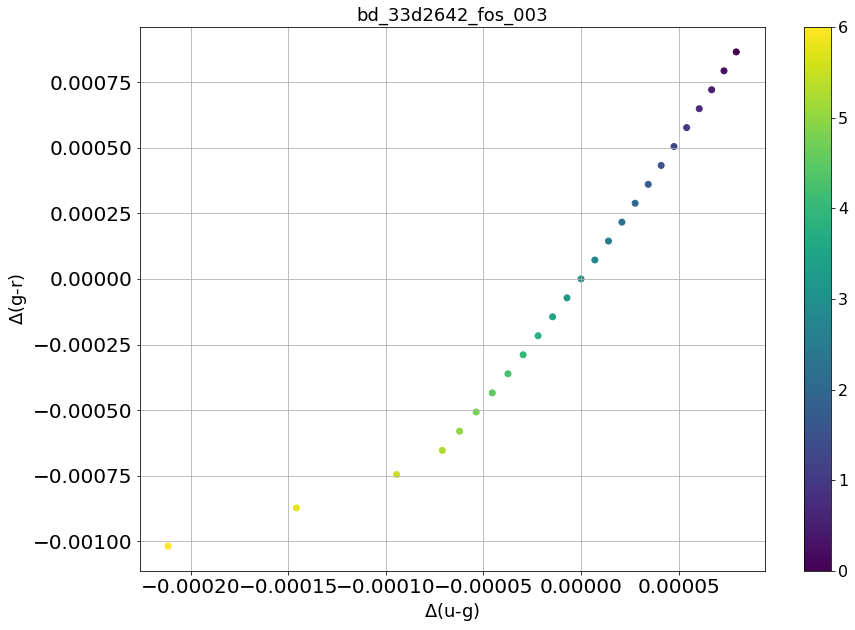

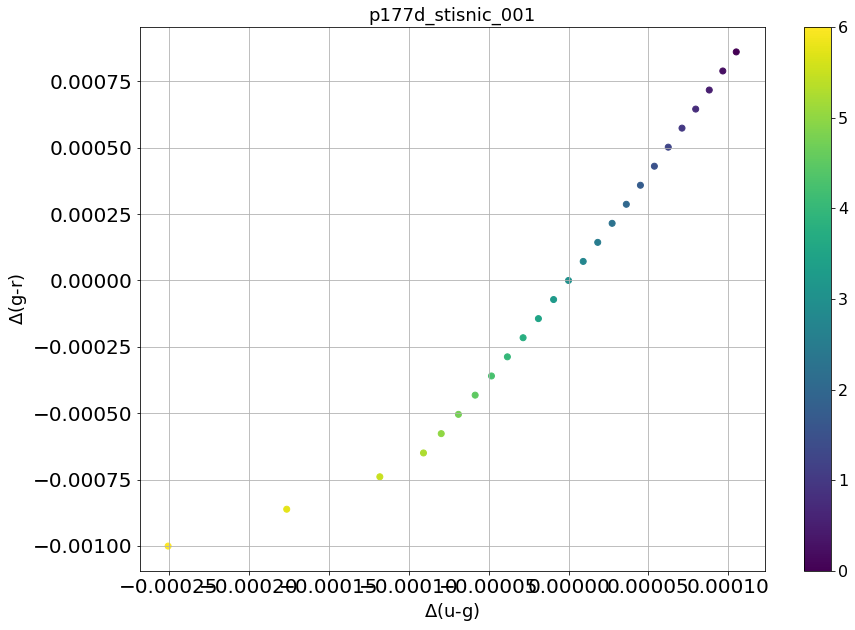

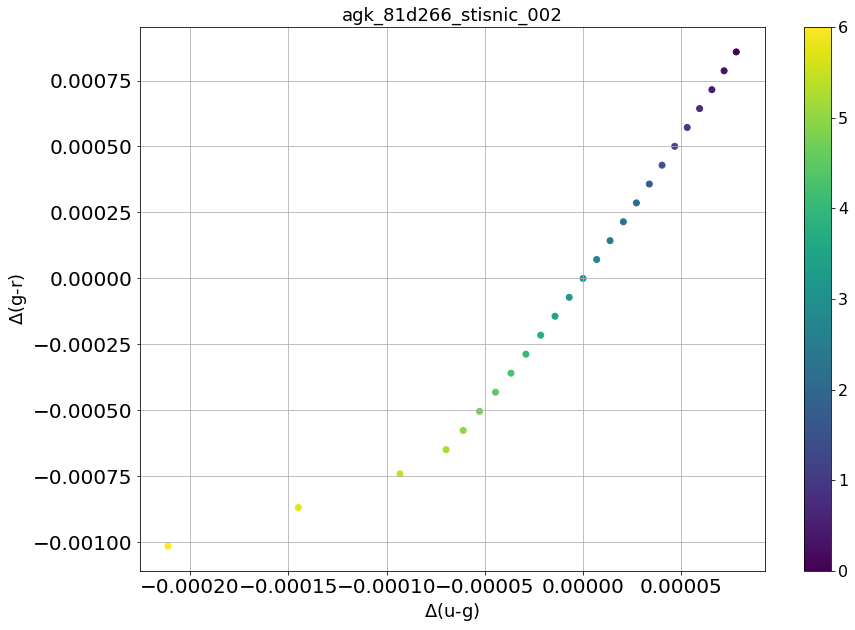

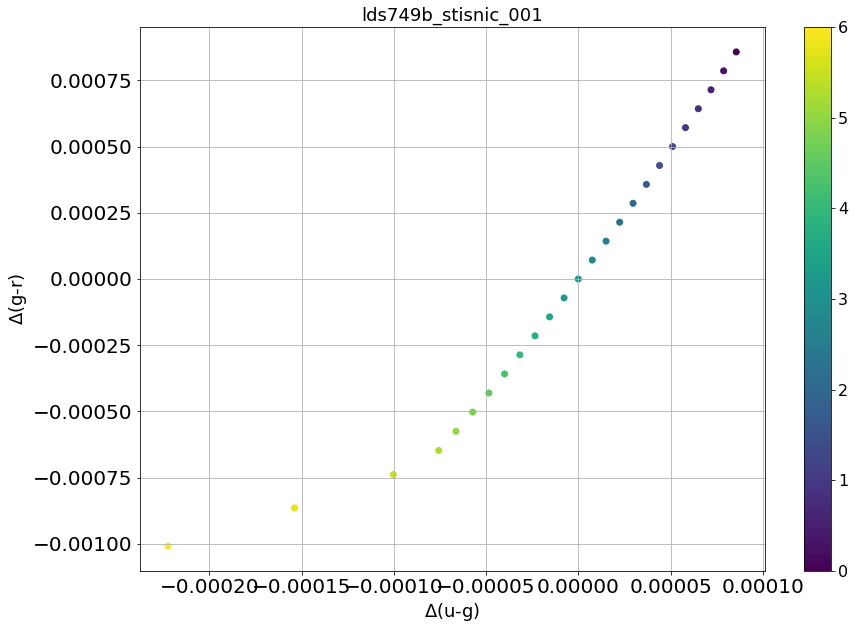

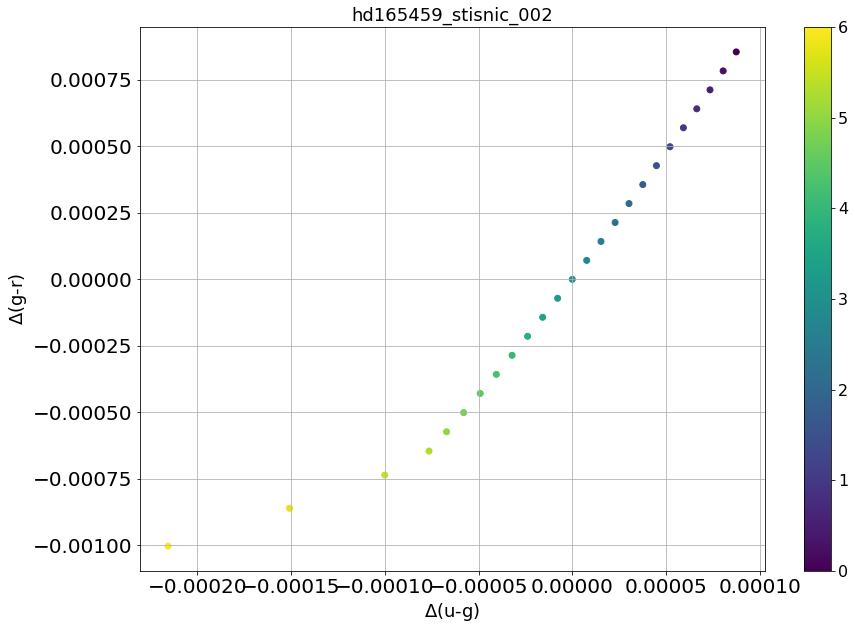

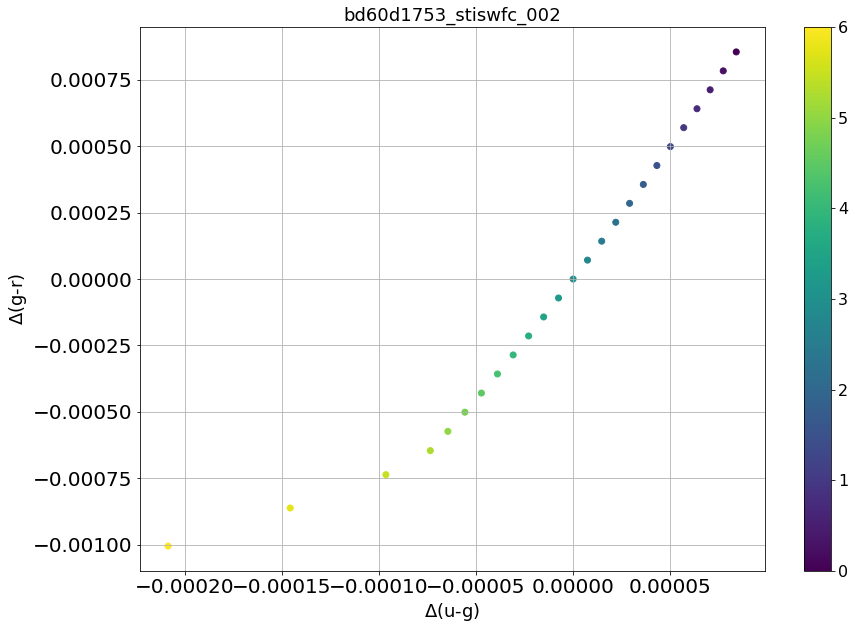

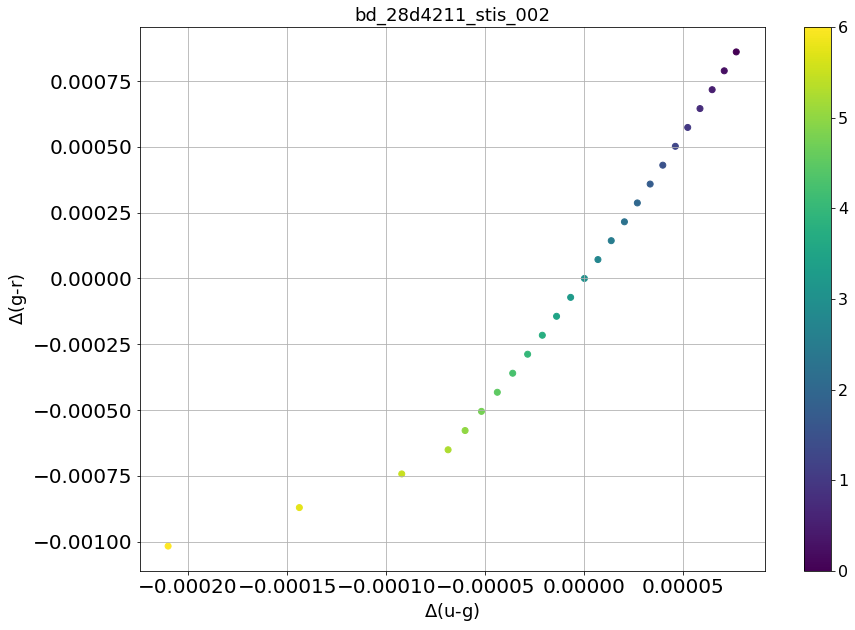

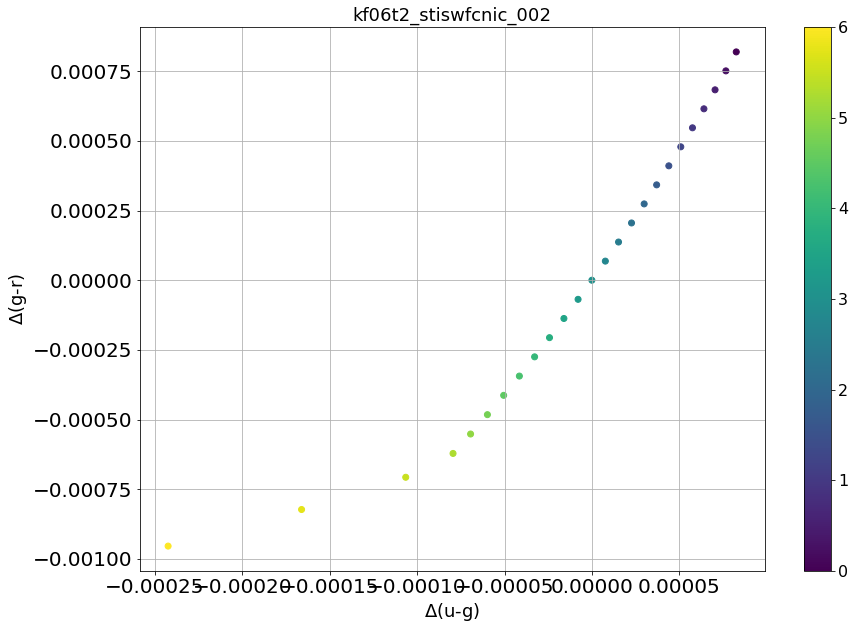

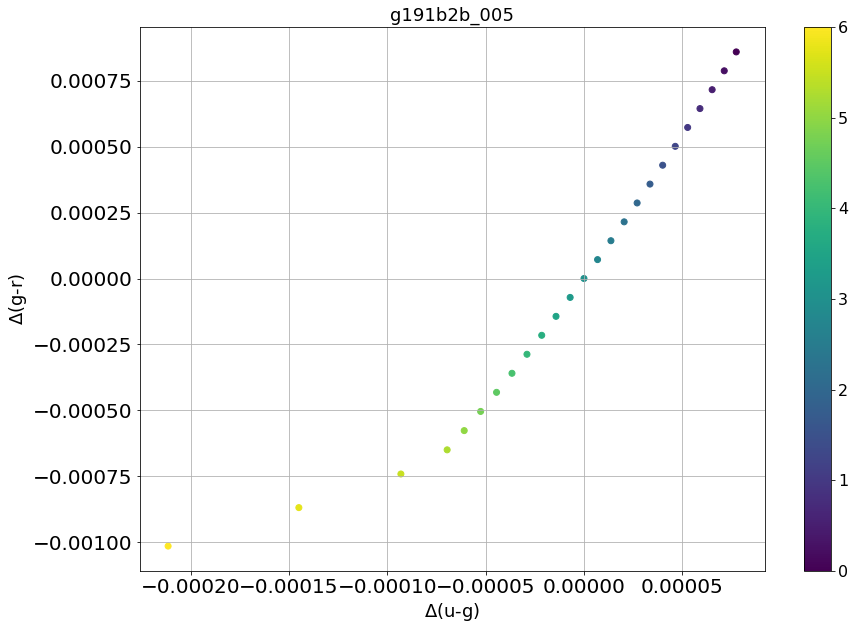

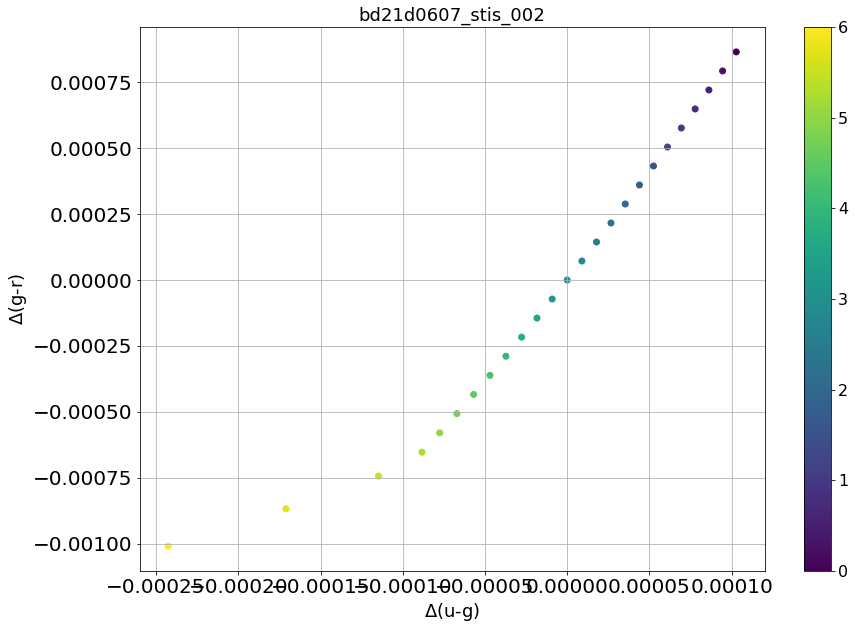

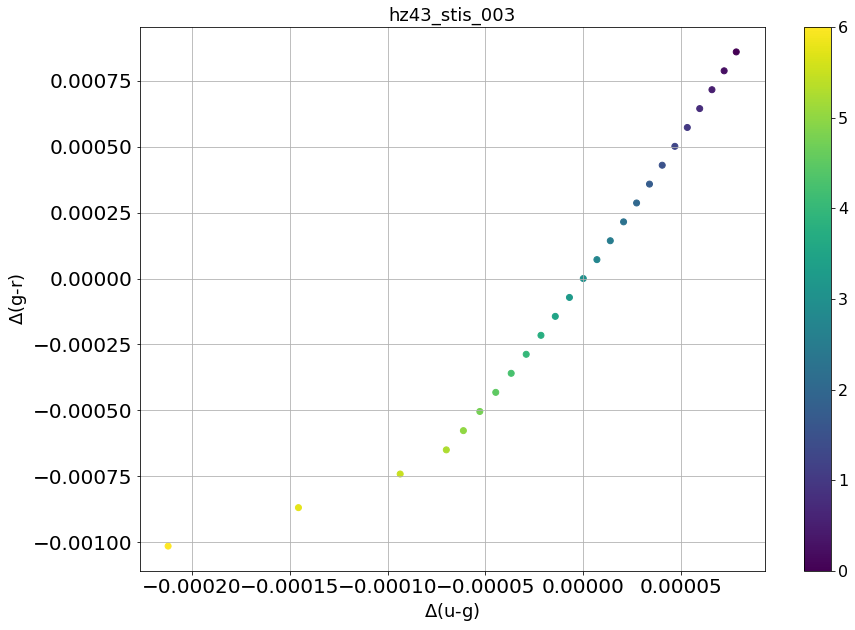

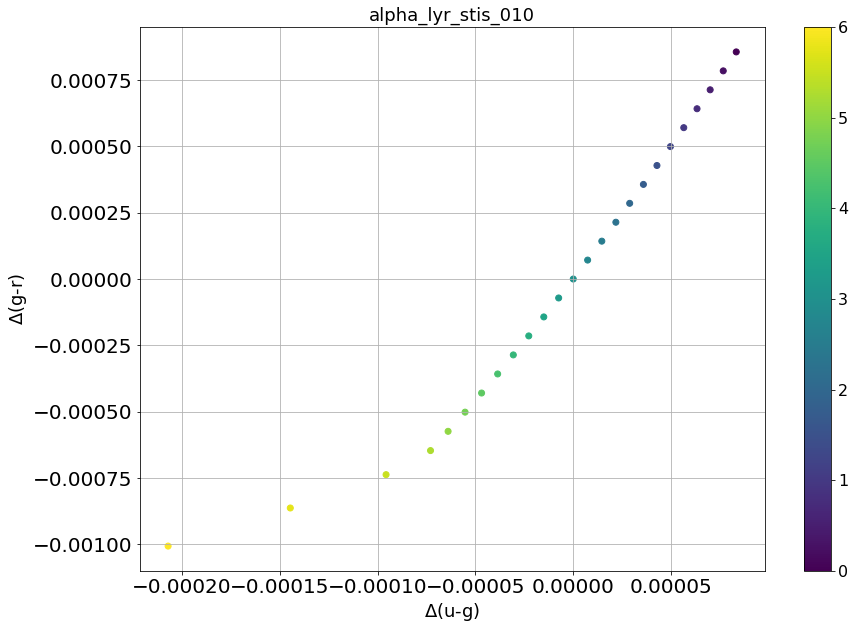

In [106]:
colorx = 'u-g'
colory = 'g-r'
for sed_ in list(colour_dict.keys()):
    plt.figure(figsize=(14,10))
    delta1 = colour_dict[sed_]['u-g']-colour_dict_ref[sed_]['u-g']
    delta2 = colour_dict[sed_]['g-r']-colour_dict_ref[sed_]['g-r']
    plt.scatter(delta1,delta2,c=atm_vals)
    plt.grid()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$\Delta$'+'('+colorx+')',fontsize=18)
    plt.ylabel(r'$\Delta$'+'('+colory+')',fontsize=18)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=16)
    plt.title(sed_,fontsize=18)


Text(0.5, 1.0, 'Varying aerosols')

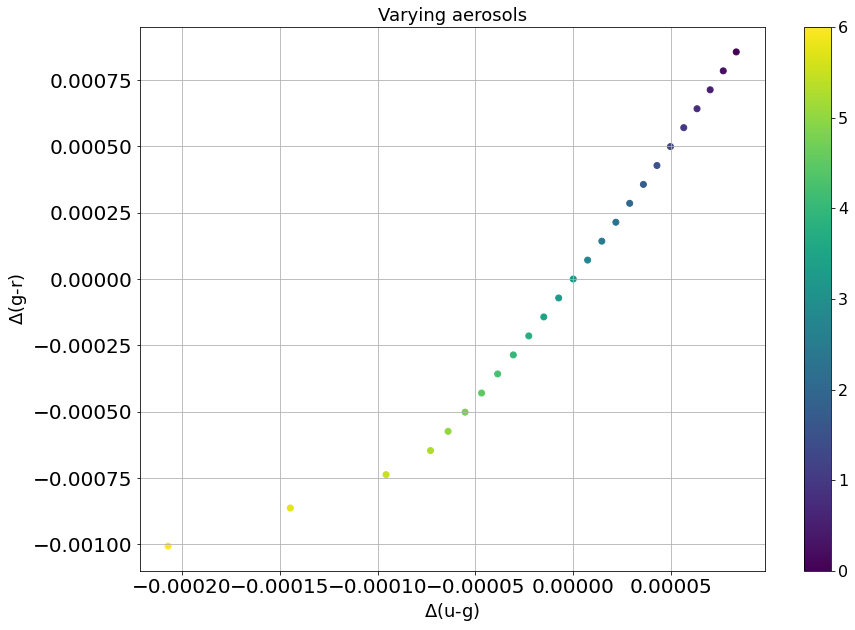

In [107]:
colorx = 'u-g'
colory = 'g-r'
plt.figure(figsize=(14,10))
delta1 = colour_dict[example_spec]['u-g']-colour_dict_ref[example_spec]['u-g']
delta2 = colour_dict[example_spec]['g-r']-colour_dict_ref[example_spec]['g-r']
plt.scatter(delta1,delta2,c=atm_vals)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$\Delta$'+'('+colorx+')',fontsize=18)
plt.ylabel(r'$\Delta$'+'('+colory+')',fontsize=18)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.title('Varying aerosols',fontsize=18)
#plt.savefig('delta_colours_test.png')

In [108]:
mag_dict[example_spec]['U'][min_ind_]

1.1805656940362903

In [109]:
mag_dict[example_spec]['U'][max_ind_]

1.1803408235237576

In [110]:
np.min(mag_dict[example_spec]['U']), np.max(mag_dict[example_spec]['U'])

(1.1803408235237576, 1.1805656940362903)

In [111]:
colour_dict[example_spec]['u-g'][min_ind_]

1.0299491622656032

In [112]:
colour_dict[example_spec]['u-g'][max_ind_]

1.029658752216481

In [113]:
np.min(colour_dict[example_spec]['u-g']), np.max(colour_dict[example_spec]['u-g'])

(1.029658752216481, 1.0299491622656032)